The COVID-19 pandemic has had a significant global impact, resulting in widespread illness and loss of life, and disrupting economies and societies. A useful tool for comprehending the pandemic's impact is to analyze data on the number of new cases, deaths, and vaccinations. This notebook provides information on new cases and deaths per million people, as well as data on first, second, and third doses of the COVID-19 vaccine globally and by continent over a specific time frame. Analyzing this data provides valuable insights into the pandemic's spread, the efficacy of vaccination efforts, and other factors that may be influencing its trajectory.

# Data Cleaning and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

rnr = df[['continent', 'location', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']]

dfe = rnr.groupby('location')[['total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].max()

sd = dfe.reset_index()

sm = sd.drop(index=[1,12,70,71,96,127,128,162,169,211,241,251])

sn = sm.reset_index()

top20_ca = sn.sort_values('total_cases', ascending=False).head(20)
top20_cases = top20_ca[['location', 'total_cases']].reset_index().drop('index', axis=1)

top20_capm = sn.sort_values('total_cases_per_million', ascending=False).head(20)
top20_casespm = top20_capm[['location', 'total_cases_per_million']].reset_index().drop('index', axis=1)

top20_de = sn.sort_values('total_deaths', ascending=False).head(20)
top20_deaths = top20_de[['location', 'total_deaths']].reset_index().drop('index', axis=1)

top20_depm = sn.sort_values('total_deaths_per_million', ascending=False).head(20)
top20_deathspm = top20_depm[['location', 'total_deaths_per_million']].reset_index().drop('index', axis=1)

top20_vac = sn.sort_values('people_vaccinated', ascending=False).head(20)
top20_vaccinated = top20_vac[['location', 'people_vaccinated']].reset_index().drop('index', axis=1)

top20_fullvac = sn.sort_values('people_fully_vaccinated', ascending=False).head(20)
top20_fullvaccinated = top20_fullvac[['location', 'people_fully_vaccinated']].reset_index().drop('index', axis=1)

top20_boos = sn.sort_values('total_boosters', ascending=False).head(20)
top20_boosters = top20_boos[['location', 'total_boosters']].reset_index().drop('index', axis=1)

kdm = sn.drop('index', axis=1)

# Brief Overview

In [3]:
kdm

,location,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,people_vaccinated,people_fully_vaccinated,total_boosters,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,life_expectancy,human_development_index
0,Afghanistan,209414.0,5091.667,7879.0,191.569,1.405577e+07,1.333710e+07,896852.0,34.18,32.43,2.18,4.112877e+07,54.422,18.6,2.581,1.337,1803.987,64.83,0.511
1,Albania,333532.0,117345.068,3598.0,1265.868,1.345763e+06,1.274719e+06,390033.0,47.35,44.85,13.72,2.842318e+06,104.871,38.0,13.188,8.643,11803.431,78.57,0.795
2,Algeria,271463.0,6045.512,6881.0,153.241,7.840131e+06,6.481186e+06,575651.0,17.46,14.43,1.28,4.490323e+07,17.348,29.1,6.211,3.857,13913.839,76.88,0.748
3,American Samoa,8320.0,187831.584,34.0,767.581,NaN,NaN,NaN,NaN,NaN,NaN,4.429500e+04,278.205,NaN,NaN,NaN,NaN,73.74,NaN
4,Andorra,47890.0,599802.112,159.0,1991.408,5.790300e+04,5.349200e+04,43049.0,72.52,67.00,53.92,7.984300e+04,163.755,NaN,NaN,NaN,NaN,83.73,0.868
5,Angola,105277.0,2958.133,1933.0,54.315,1.534978e+07,8.504173e+06,1736921.0,43.13,23.90,4.88,3.558900e+07,23.890,16.8,2.405,1.362,5819.495,61.15,0.581
6,Anguilla,3904.0,245890.282,12.0,755.810,1.085400e+04,1.038000e+04,3309.0,68.36,65.38,20.84,1.587700e+04,NaN,NaN,NaN,NaN,NaN,81.88,NaN
7,Antigua and Barbuda,9106.0,97107.879,146.0,1556.968,6.429000e+04,6.238400e+04,9838.0,68.56,66.53,10.49,9.377200e+04,231.845,32.1,6.933,4.631,21490.943,77.02,0.778
8,Argentina,10044957.0,220718.205,130472.0,2866.866,4.147655e+07,3.485420e+07,35831372.0,91.14,76.59,78.73,4.551032e+07,16.177,31.9,11.198,7.441,18933.907,76.67,0.845
9,Armenia,447308.0,160874.844,8727.0,3138.676,1.129669e+06,9.858070e+05,40725.0,40.63,35.45,1.46,2.780472e+06,102.931,35.7,11.232,7.571,8787.580,75.09,0.776


In [4]:
precon = rnr.groupby('location')[['continent', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].max().reset_index().drop(index=[1,11,69,70,93,100,125,126,158,165,204,234,244])

continents = precon[['continent', 'location', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].sort_values(['continent','location'], ascending = True).reset_index().drop('index', axis=1)

africa10_ca = continents[continents['continent'] == 'Africa'].sort_values('total_cases', ascending=False).head(10).reset_index().drop('index', axis=1)
africa10_cases = africa10_ca[['location', 'total_cases']]

africa10_capm = continents[continents['continent'] == 'Africa'].sort_values('total_cases_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
africa10_casespm = africa10_capm[['location', 'total_cases_per_million']]

africa10_de = continents[continents['continent'] == 'Africa'].sort_values('total_deaths', ascending=False).head(10).reset_index().drop('index', axis=1)
africa10_deaths = africa10_de[['location', 'total_deaths']]

africa10_depm = continents[continents['continent'] == 'Africa'].sort_values('total_deaths_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
africa10_deathspm = africa10_depm[['location', 'total_deaths_per_million']]

africa10_vac = continents[continents['continent'] == 'Africa'].sort_values('people_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
africa10_vaccinated = africa10_vac[['location', 'people_vaccinated']]

africa10_fullvac = continents[continents['continent'] == 'Africa'].sort_values('people_fully_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
africa10_fullvaccinated = africa10_fullvac[['location', 'people_fully_vaccinated']]

africa10_boos = continents[continents['continent'] == 'Africa'].sort_values('total_boosters', ascending=False).head(10).reset_index().drop('index', axis=1)
africa10_boosters = africa10_boos[['location', 'total_boosters']]

In [5]:
precon = rnr.groupby('location')[['continent', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].max().reset_index().drop(index=[1,11,69,70,93,100,125,126,158,165,204,234,244])

continents = precon[['continent', 'location', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].sort_values(['continent','location'], ascending = True).reset_index().drop('index', axis=1)

asia10_ca = continents[continents['continent'] == 'Asia'].sort_values('total_cases', ascending=False).head(10).reset_index().drop('index', axis=1)
asia10_cases = asia10_ca[['location', 'total_cases']]

asia10_capm = continents[continents['continent'] == 'Asia'].sort_values('total_cases_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
asia10_casespm = asia10_capm[['location', 'total_cases_per_million']]

asia10_de = continents[continents['continent'] == 'Asia'].sort_values('total_deaths', ascending=False).head(10).reset_index().drop('index', axis=1)
asia10_deaths = asia10_de[['location', 'total_deaths']]

asia10_depm = continents[continents['continent'] == 'Asia'].sort_values('total_deaths_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
asia10_deathspm = asia10_depm[['location', 'total_deaths_per_million']]

asia10_vac = continents[continents['continent'] == 'Asia'].sort_values('people_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
asia10_vaccinated = asia10_vac[['location', 'people_vaccinated']]

asia10_fullvac = continents[continents['continent'] == 'Asia'].sort_values('people_fully_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
asia10_fullvaccinated = asia10_fullvac[['location', 'people_fully_vaccinated']]

asia10_boos = continents[continents['continent'] == 'Asia'].sort_values('total_boosters', ascending=False).head(10).reset_index().drop('index', axis=1)
asia10_boosters = asia10_boos[['location', 'total_boosters']]

In [6]:
precon = rnr.groupby('location')[['continent', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].max().reset_index().drop(index=[1,11,69,70,93,100,125,126,158,165,204,234,244])

continents = precon[['continent', 'location', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].sort_values(['continent','location'], ascending = True).reset_index().drop('index', axis=1)

europe10_ca = continents[continents['continent'] == 'Europe'].sort_values('total_cases', ascending=False).head(10).reset_index().drop('index', axis=1)
europe10_cases = europe10_ca[['location', 'total_cases']]

europe10_capm = continents[continents['continent'] == 'Europe'].sort_values('total_cases_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
europe10_casespm = europe10_capm[['location', 'total_cases_per_million']]

europe10_de = continents[continents['continent'] == 'Europe'].sort_values('total_deaths', ascending=False).head(10).reset_index().drop('index', axis=1)
europe10_deaths = europe10_de[['location', 'total_deaths']]

europe10_depm = continents[continents['continent'] == 'Europe'].sort_values('total_deaths_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
europe10_deathspm = europe10_depm[['location', 'total_deaths_per_million']]

europe10_vac = continents[continents['continent'] == 'Europe'].sort_values('people_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
europe10_vaccinated = europe10_vac[['location', 'people_vaccinated']]

europe10_fullvac = continents[continents['continent'] == 'Europe'].sort_values('people_fully_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
europe10_fullvaccinated = europe10_fullvac[['location', 'people_fully_vaccinated']]

europe10_boos = continents[continents['continent'] == 'Europe'].sort_values('total_boosters', ascending=False).head(10).reset_index().drop('index', axis=1)
europe10_boosters = europe10_boos[['location', 'total_boosters']]

In [7]:
precon = rnr.groupby('location')[['continent', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].max().reset_index().drop(index=[1,11,69,70,93,100,125,126,158,165,204,234,244])

continents = precon[['continent', 'location', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].sort_values(['continent','location'], ascending = True).reset_index().drop('index', axis=1)

nam10_ca = continents[continents['continent'] == 'North America'].sort_values('total_cases', ascending=False).head(10).reset_index().drop('index', axis=1)
nam10_cases = nam10_ca[['location', 'total_cases']]

nam10_capm = continents[continents['continent'] == 'North America'].sort_values('total_cases_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
nam10_casespm = nam10_capm[['location', 'total_cases_per_million']]

nam10_de = continents[continents['continent'] == 'North America'].sort_values('total_deaths', ascending=False).head(10).reset_index().drop('index', axis=1)
nam10_deaths = nam10_de[['location', 'total_deaths']]

nam10_depm = continents[continents['continent'] == 'North America'].sort_values('total_deaths_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
nam10_deathspm = nam10_depm[['location', 'total_deaths_per_million']]

nam10_vac = continents[continents['continent'] == 'North America'].sort_values('people_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
nam10_vaccinated = nam10_vac[['location', 'people_vaccinated']]

nam10_fullvac = continents[continents['continent'] == 'North America'].sort_values('people_fully_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
nam10_fullvaccinated = nam10_fullvac[['location', 'people_fully_vaccinated']]

nam10_boos = continents[continents['continent'] == 'North America'].sort_values('total_boosters', ascending=False).head(10).reset_index().drop('index', axis=1)
nam10_boosters = nam10_boos[['location', 'total_boosters']]

In [8]:
precon = rnr.groupby('location')[['continent', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].max().reset_index().drop(index=[1,11,69,70,93,100,125,126,158,165,204,234,244])

continents = precon[['continent', 'location', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].sort_values(['continent','location'], ascending = True).reset_index().drop('index', axis=1)

sam10_ca = continents[continents['continent'] == 'South America'].sort_values('total_cases', ascending=False).head(10).reset_index().drop('index', axis=1)
sam10_cases = sam10_ca[['location', 'total_cases']]

sam10_capm = continents[continents['continent'] == 'South America'].sort_values('total_cases_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
sam10_casespm = sam10_capm[['location', 'total_cases_per_million']]

sam10_de = continents[continents['continent'] == 'South America'].sort_values('total_deaths', ascending=False).head(10).reset_index().drop('index', axis=1)
sam10_deaths = sam10_de[['location', 'total_deaths']]

sam10_depm = continents[continents['continent'] == 'South America'].sort_values('total_deaths_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
sam10_deathspm = sam10_depm[['location', 'total_deaths_per_million']]

sam10_vac = continents[continents['continent'] == 'South America'].sort_values('people_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
sam10_vaccinated = sam10_vac[['location', 'people_vaccinated']]

sam10_fullvac = continents[continents['continent'] == 'South America'].sort_values('people_fully_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
sam10_fullvaccinated = sam10_fullvac[['location', 'people_fully_vaccinated']]

sam10_boos = continents[continents['continent'] == 'South America'].sort_values('total_boosters', ascending=False).head(10).reset_index().drop('index', axis=1)
sam10_boosters = sam10_boos[['location', 'total_boosters']]

In [9]:
precon = rnr.groupby('location')[['continent', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].max().reset_index().drop(index=[1,11,69,70,93,100,125,126,158,165,204,234,244])

continents = precon[['continent', 'location', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].sort_values(['continent','location'], ascending = True).reset_index().drop('index', axis=1)

oce10_ca = continents[continents['continent'] == 'Oceania'].sort_values('total_cases', ascending=False).head(10).reset_index().drop('index', axis=1)
oce10_cases = oce10_ca[['location', 'total_cases']]

oce10_capm = continents[continents['continent'] == 'Oceania'].sort_values('total_cases_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
oce10_casespm = oce10_capm[['location', 'total_cases_per_million']]

oce10_de = continents[continents['continent'] == 'Oceania'].sort_values('total_deaths', ascending=False).head(10).reset_index().drop('index', axis=1)
oce10_deaths = oce10_de[['location', 'total_deaths']]

oce10_depm = continents[continents['continent'] == 'Oceania'].sort_values('total_deaths_per_million', ascending=False).head(10).reset_index().drop('index', axis=1)
oce10_deathspm = oce10_depm[['location', 'total_deaths_per_million']]

oce10_vac = continents[continents['continent'] == 'Oceania'].sort_values('people_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
oce10_vaccinated = oce10_vac[['location', 'people_vaccinated']]

oce10_fullvac = continents[continents['continent'] == 'Oceania'].sort_values('people_fully_vaccinated', ascending=False).head(10).reset_index().drop('index', axis=1)
oce10_fullvaccinated = oce10_fullvac[['location', 'people_fully_vaccinated']]

oce10_boos = continents[continents['continent'] == 'Oceania'].sort_values('total_boosters', ascending=False).head(10).reset_index().drop('index', axis=1)
oce10_boosters = oce10_boos[['location', 'total_boosters']]

In [10]:
new_df = sd.loc[[1,12,70,162,169,211]].reset_index().drop(['index','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','life_expectancy','human_development_index'], axis=1)

In [11]:
new_df

,location,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,people_vaccinated,people_fully_vaccinated,total_boosters,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population
0,Africa,13053883.0,9149.469,258748.0,181.357,5.053902e+08,4.177394e+08,7.639702e+07,35.42,29.28,5.35,1.426737e+09
1,Asia,294846415.0,62449.158,1624653.0,344.105,3.666959e+09,3.433644e+09,1.782843e+09,77.67,72.73,37.76,4.721383e+09
2,Europe,246769927.0,331320.276,2023316.0,2716.561,5.227133e+08,4.992528e+08,3.575768e+08,70.18,67.03,48.01,7.448078e+08
3,North America,122709749.0,204405.986,1583415.0,2637.602,4.573262e+08,3.934715e+08,2.511464e+08,76.18,65.54,41.84,6.003237e+08
4,Oceania,14043499.0,311808.492,25324.0,562.270,2.895752e+07,2.792110e+07,2.399748e+07,64.29,61.99,53.28,4.503886e+07
5,South America,67979025.0,155623.694,1350960.0,3092.739,3.748751e+08,3.363807e+08,2.514730e+08,85.82,77.01,57.57,4.368167e+08


# Data Visualizations

# TOP 20 COUNTRIES

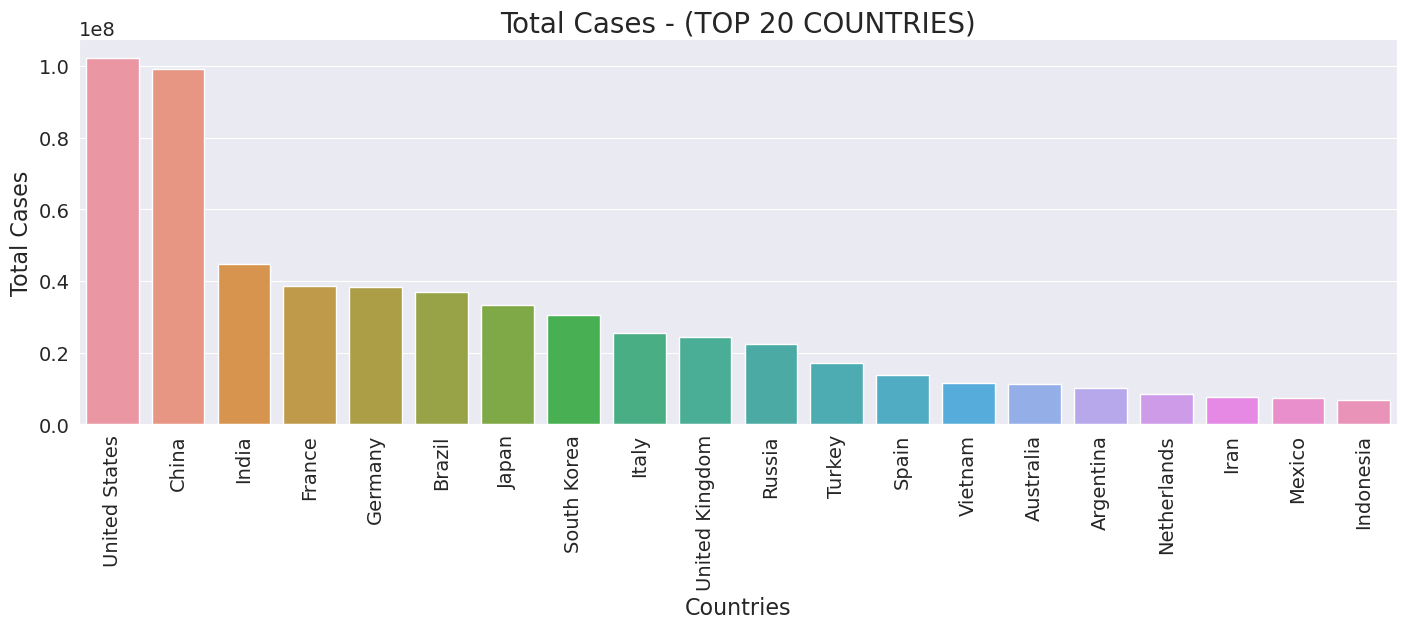

In [12]:
sns.barplot(x='location', y='total_cases', data=top20_cases)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases', fontsize=16)
plt.title('Total Cases - (TOP 20 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [13]:
top20_cases

,location,total_cases
0,United States,102247392.0
1,China,99109603.0
2,India,44688367.0
3,France,38538948.0
4,Germany,38221663.0
5,Brazil,37076053.0
6,Japan,33264491.0
7,South Korea,30581499.0
8,Italy,25603510.0
9,United Kingdom,24396534.0


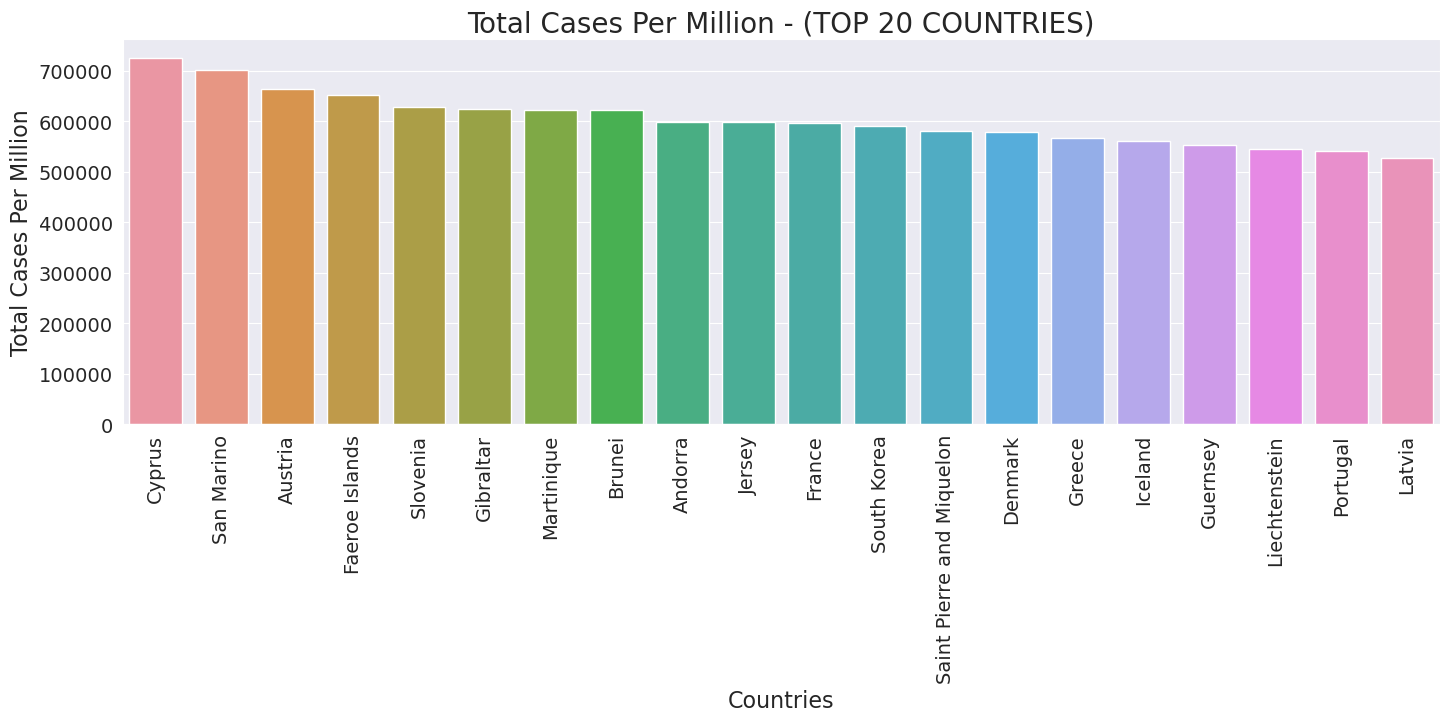

In [14]:
sns.barplot(x='location', y='total_cases_per_million', data=top20_casespm)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases Per Million', fontsize=16)
plt.title('Total Cases Per Million - (TOP 20 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [15]:
top20_casespm

,location,total_cases_per_million
0,Cyprus,726205.264
1,San Marino,700979.519
2,Austria,664840.227
3,Faeroe Islands,652484.139
4,Slovenia,627713.467
5,Gibraltar,625302.200
6,Martinique,623163.325
7,Brunei,622850.232
8,Andorra,599802.112
9,Jersey,599218.383


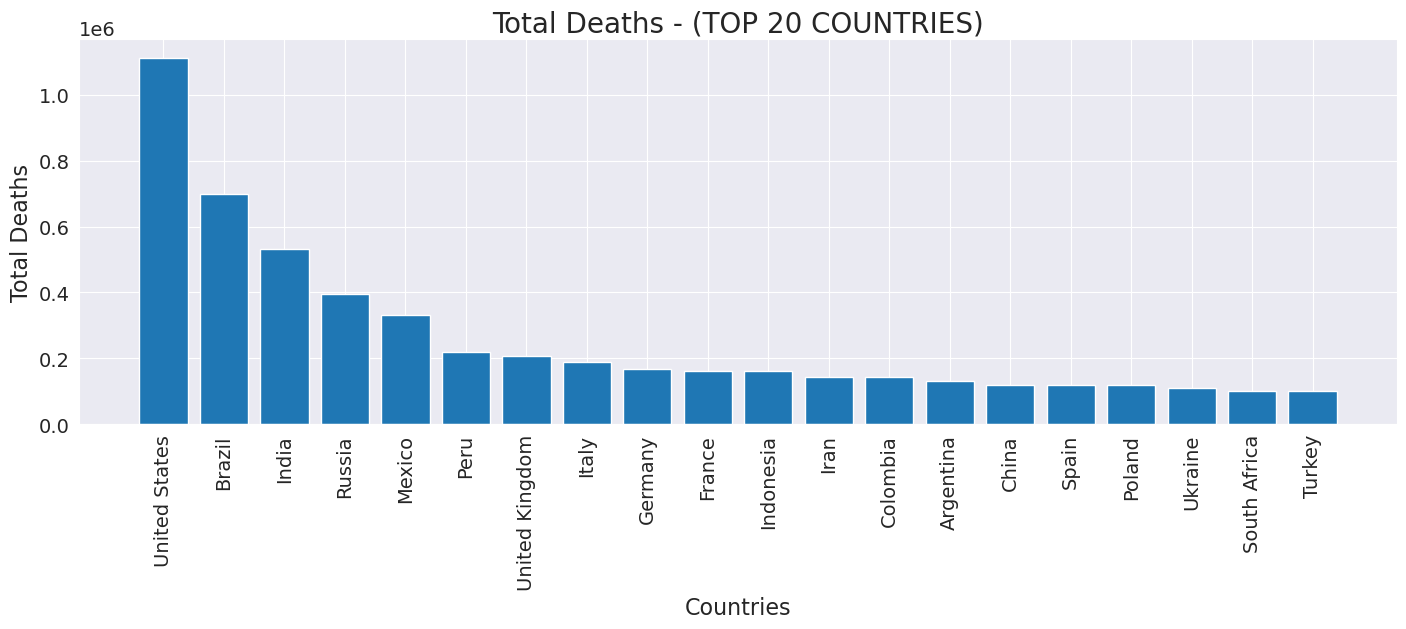

In [16]:
plt.bar(top20_deaths['location'], top20_deaths['total_deaths'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.title('Total Deaths - (TOP 20 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [17]:
top20_deaths

,location,total_deaths
0,United States,1111342.0
1,Brazil,699276.0
2,India,530775.0
3,Russia,396378.0
4,Mexico,333100.0
5,Peru,219493.0
6,United Kingdom,207695.0
7,Italy,188322.0
8,Germany,168583.0
9,France,161397.0


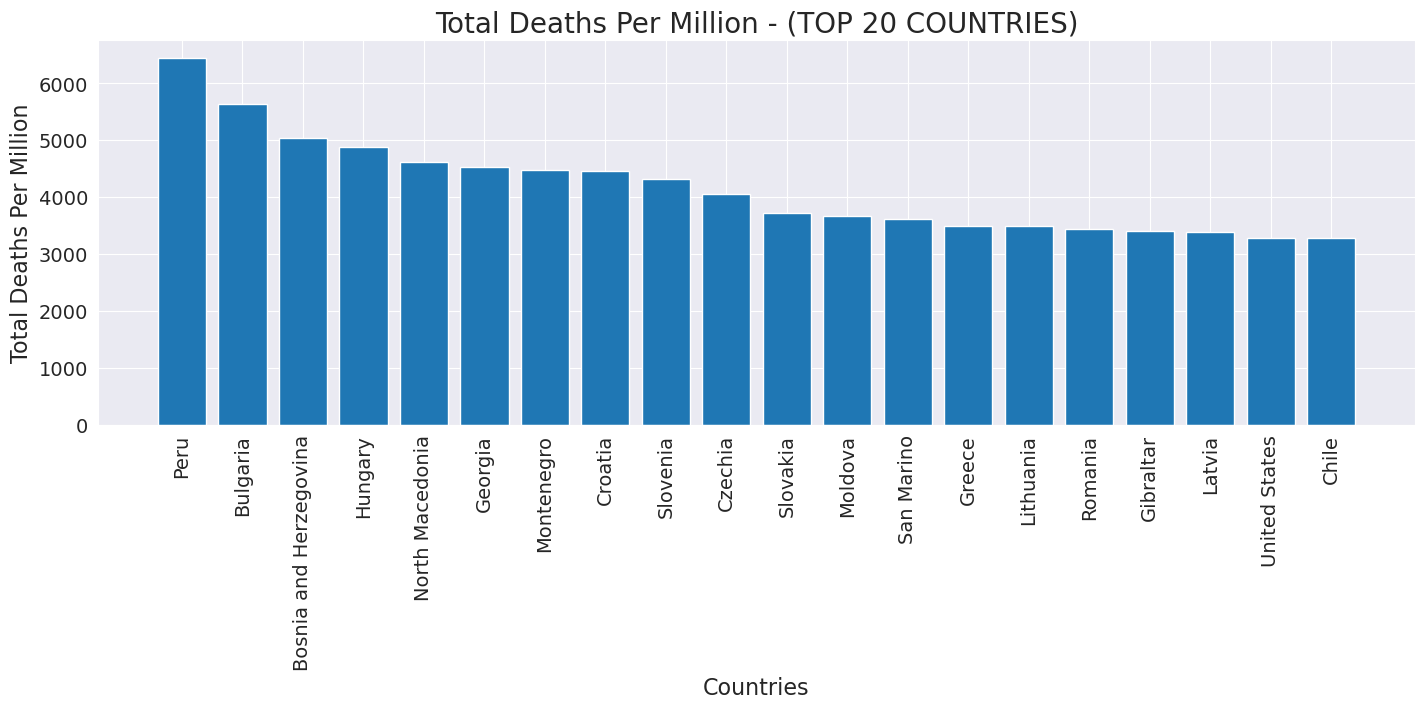

In [18]:
plt.bar(top20_deathspm['location'], top20_deathspm['total_deaths_per_million'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths Per Million', fontsize=16)
plt.title('Total Deaths Per Million - (TOP 20 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [19]:
top20_deathspm

,location,total_deaths_per_million
0,Peru,6446.275
1,Bulgaria,5635.396
2,Bosnia and Herzegovina,5034.745
3,Hungary,4881.059
4,North Macedonia,4615.004
5,Georgia,4532.386
6,Montenegro,4473.099
7,Croatia,4462.876
8,Slovenia,4316.357
9,Czechia,4048.412


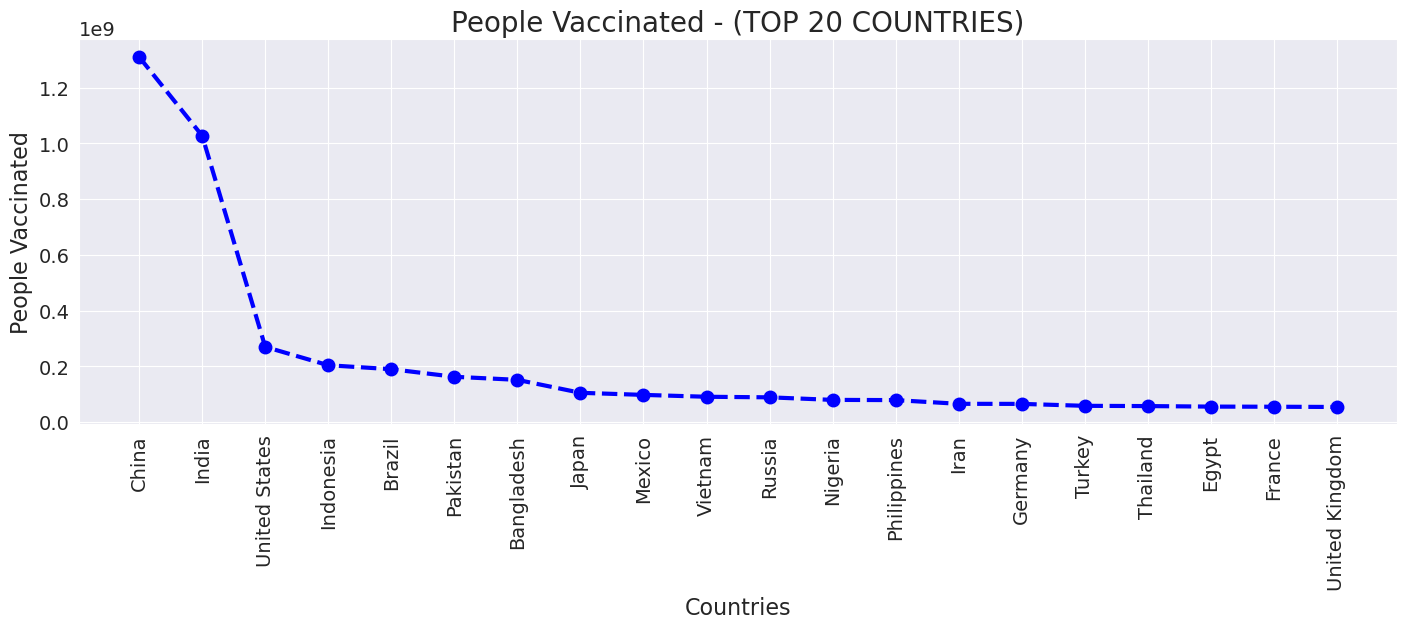

In [20]:
plt.plot(top20_vaccinated['location'], top20_vaccinated['people_vaccinated'], 'o--b', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Vaccinated', fontsize=16)
plt.title('People Vaccinated - (TOP 20 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [21]:
top20_vaccinated

,location,people_vaccinated
0,China,1.310292e+09
1,India,1.027380e+09
2,United States,2.695541e+08
3,Indonesia,2.036575e+08
4,Brazil,1.893952e+08
5,Pakistan,1.622197e+08
6,Bangladesh,1.511904e+08
7,Japan,1.046759e+08
8,Mexico,9.717949e+07
9,Vietnam,9.046695e+07


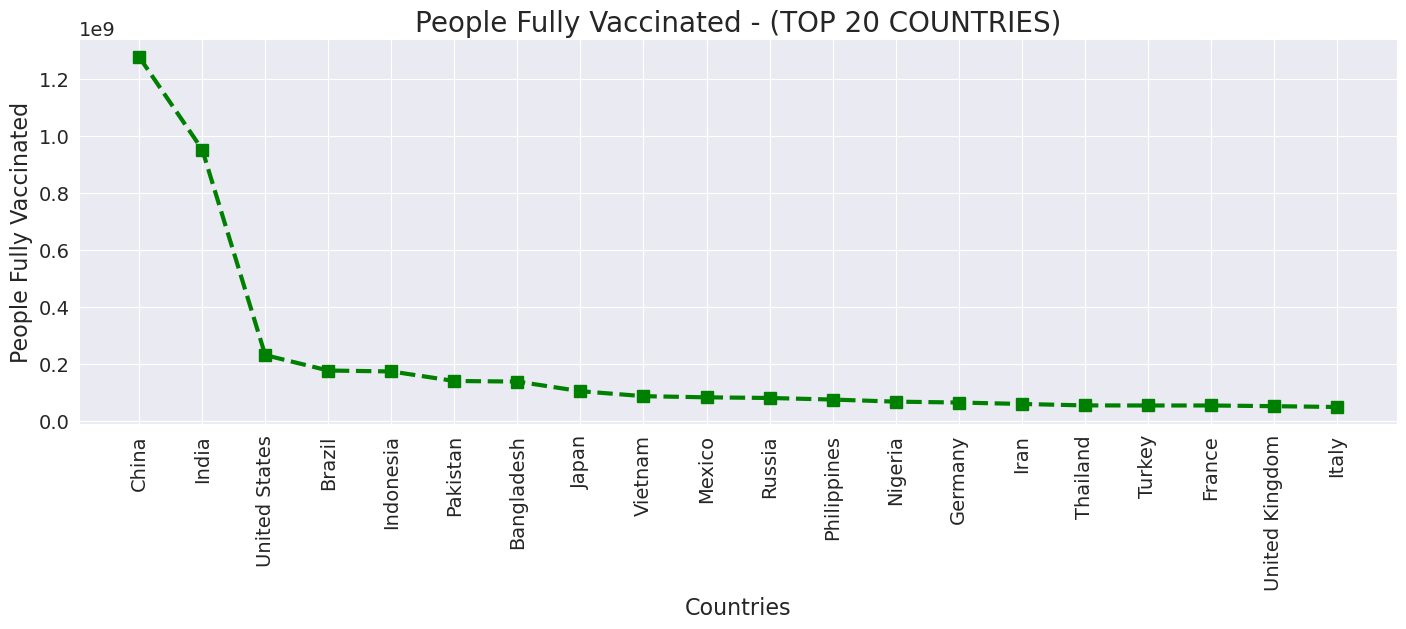

In [22]:
plt.plot(top20_fullvaccinated['location'], top20_fullvaccinated['people_fully_vaccinated'], 's--g', lw=3, ms=8)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Fully Vaccinated', fontsize=16)
plt.title('People Fully Vaccinated - (TOP 20 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [23]:
top20_fullvaccinated

,location,people_fully_vaccinated
0,China,1.276760e+09
1,India,9.518977e+08
2,United States,2.300759e+08
3,Brazil,1.759045e+08
4,Indonesia,1.726933e+08
5,Pakistan,1.392279e+08
6,Bangladesh,1.371393e+08
7,Japan,1.033301e+08
8,Vietnam,8.593192e+07
9,Mexico,8.184996e+07


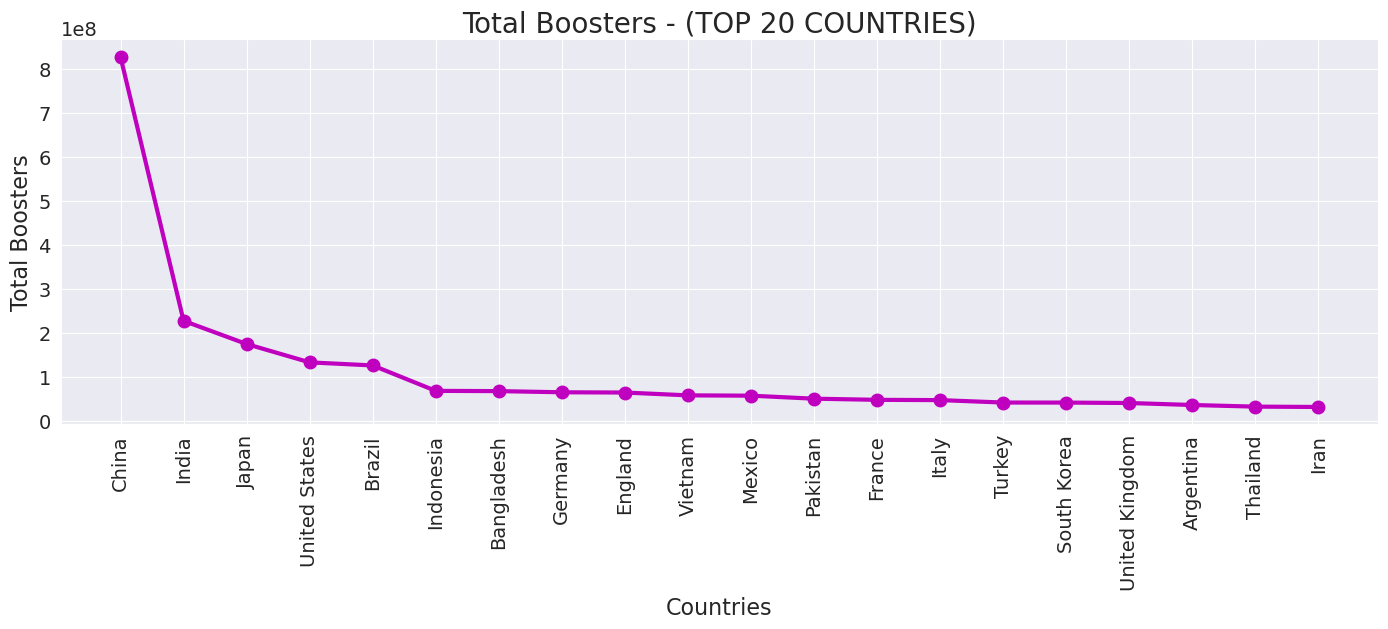

In [24]:
plt.plot(top20_boosters['location'], top20_boosters['total_boosters'], 'o-m', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Boosters', fontsize=16)
plt.title('Total Boosters - (TOP 20 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [25]:
top20_boosters

,location,total_boosters
0,China,826913000.0
1,India,227127482.0
2,Japan,174409558.0
3,United States,132741077.0
4,Brazil,125736675.0
5,Indonesia,67952274.0
6,Bangladesh,67395241.0
7,Germany,64746681.0
8,England,64173818.0
9,Vietnam,57752910.0


# AFRICA

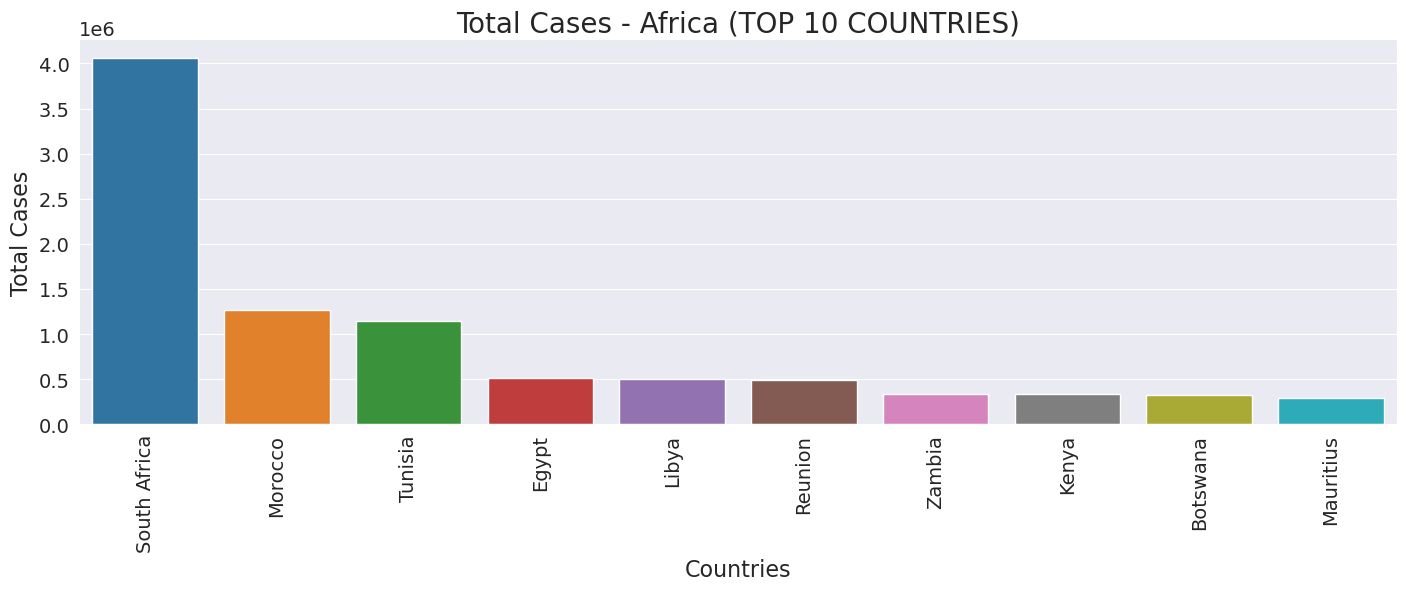

In [26]:
sns.barplot(x='location', y='total_cases', data=africa10_cases)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases', fontsize=16)
plt.title('Total Cases - Africa (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [27]:
africa10_cases

,location,total_cases
0,South Africa,4061578.0
1,Morocco,1272490.0
2,Tunisia,1150962.0
3,Egypt,515759.0
4,Libya,507187.0
5,Reunion,494595.0
6,Zambia,342954.0
7,Kenya,342932.0
8,Botswana,329758.0
9,Mauritius,296042.0


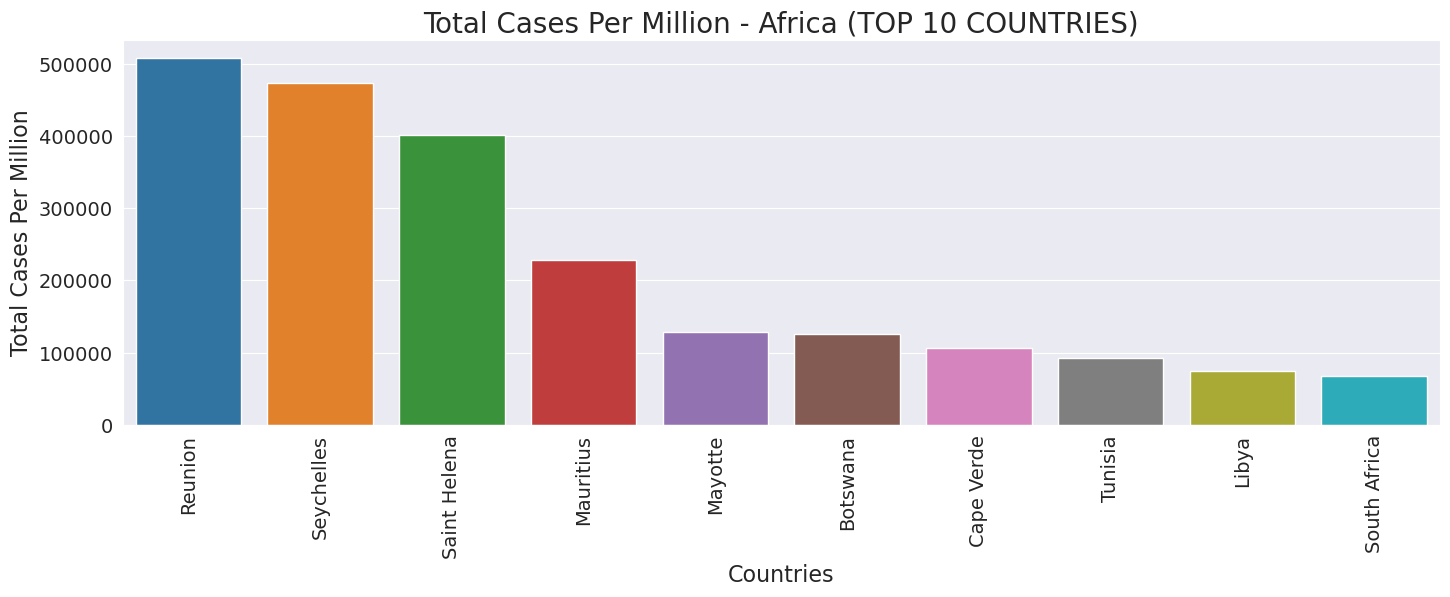

In [28]:
sns.barplot(x='location', y='total_cases_per_million', data=africa10_casespm)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases Per Million', fontsize=16)
plt.title('Total Cases Per Million - Africa (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [29]:
africa10_casespm

,location,total_cases_per_million
0,Reunion,507765.419
1,Seychelles,472908.013
2,Saint Helena,401036.845
3,Mauritius,227816.092
4,Mayotte,128801.980
5,Botswana,125368.969
6,Cape Verde,106621.800
7,Tunisia,93149.174
8,Libya,74451.173
9,South Africa,67812.901


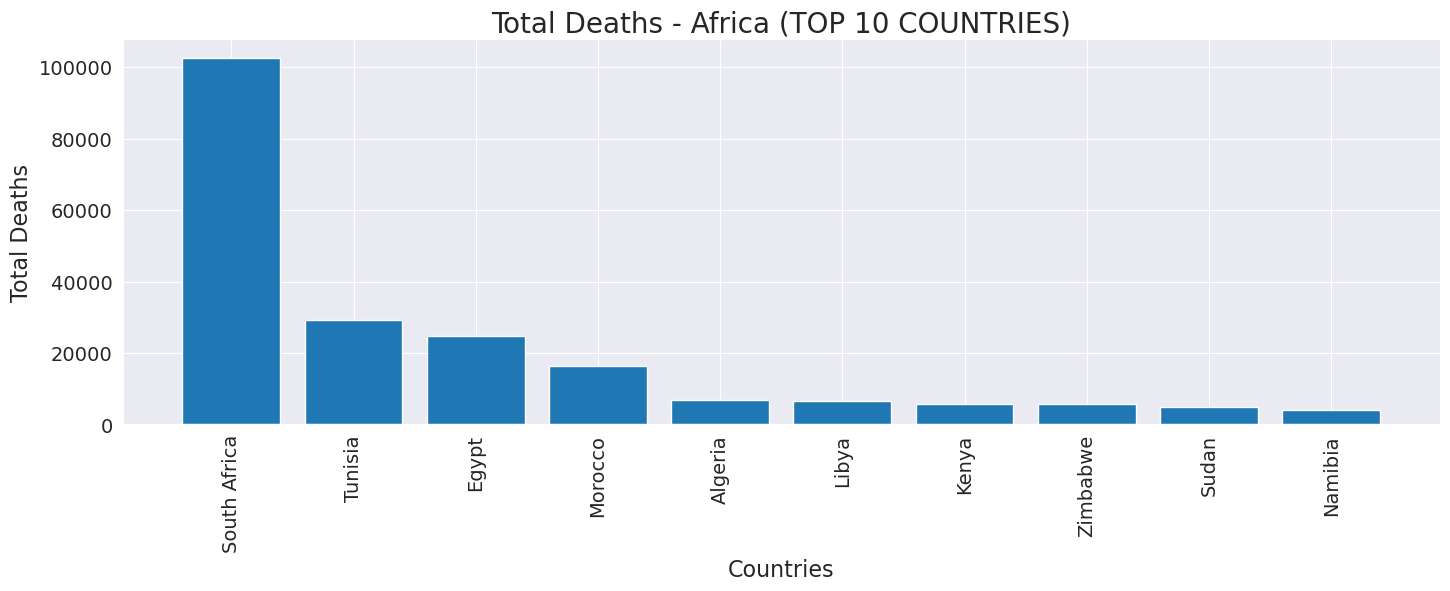

In [30]:
plt.bar(africa10_deaths['location'], africa10_deaths['total_deaths'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.title('Total Deaths - Africa (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [31]:
africa10_deaths

,location,total_deaths
0,South Africa,102595.0
1,Tunisia,29331.0
2,Egypt,24812.0
3,Morocco,16296.0
4,Algeria,6881.0
5,Libya,6437.0
6,Kenya,5688.0
7,Zimbabwe,5668.0
8,Sudan,5017.0
9,Namibia,4090.0


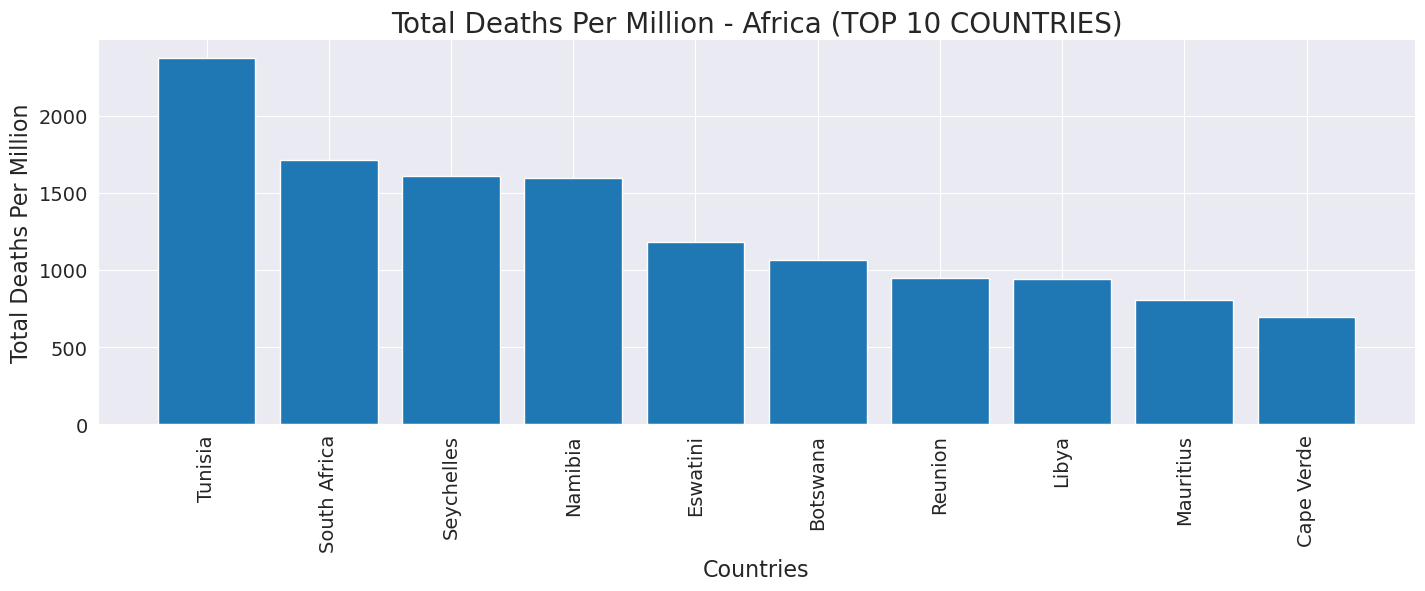

In [32]:
plt.bar(africa10_deathspm['location'], africa10_deathspm['total_deaths_per_million'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths Per Million', fontsize=16)
plt.title('Total Deaths Per Million - Africa (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [33]:
africa10_deathspm

,location,total_deaths_per_million
0,Tunisia,2373.804
1,South Africa,1712.946
2,Seychelles,1605.451
3,Namibia,1593.285
4,Eswatini,1184.175
5,Botswana,1062.616
6,Reunion,945.525
7,Libya,944.902
8,Mauritius,803.400
9,Cape Verde,696.268


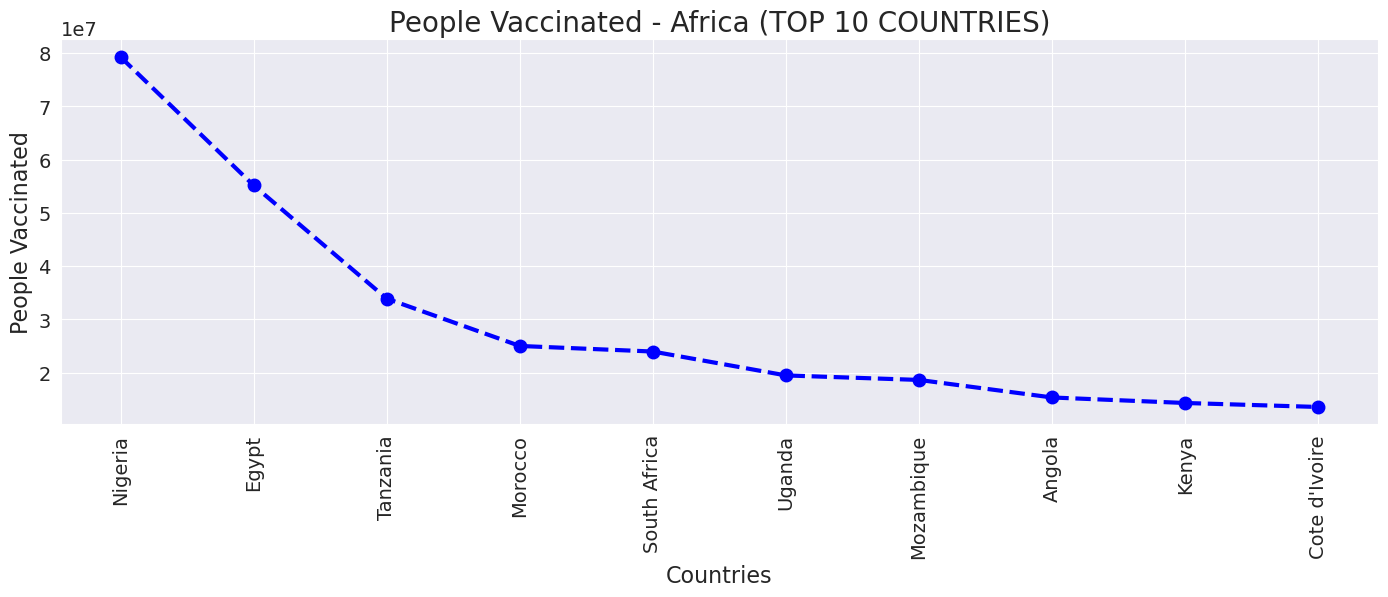

In [34]:
plt.plot(africa10_vaccinated['location'], africa10_vaccinated['people_vaccinated'], 'o--b', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Vaccinated', fontsize=16)
plt.title('People Vaccinated - Africa (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [35]:
africa10_vaccinated

,location,people_vaccinated
0,Nigeria,79248347.0
1,Egypt,55155346.0
2,Tanzania,33903098.0
3,Morocco,25019146.0
4,South Africa,23970891.0
5,Uganda,19488104.0
6,Mozambique,18641485.0
7,Angola,15349780.0
8,Kenya,14317039.0
9,Cote d'Ivoire,13568372.0


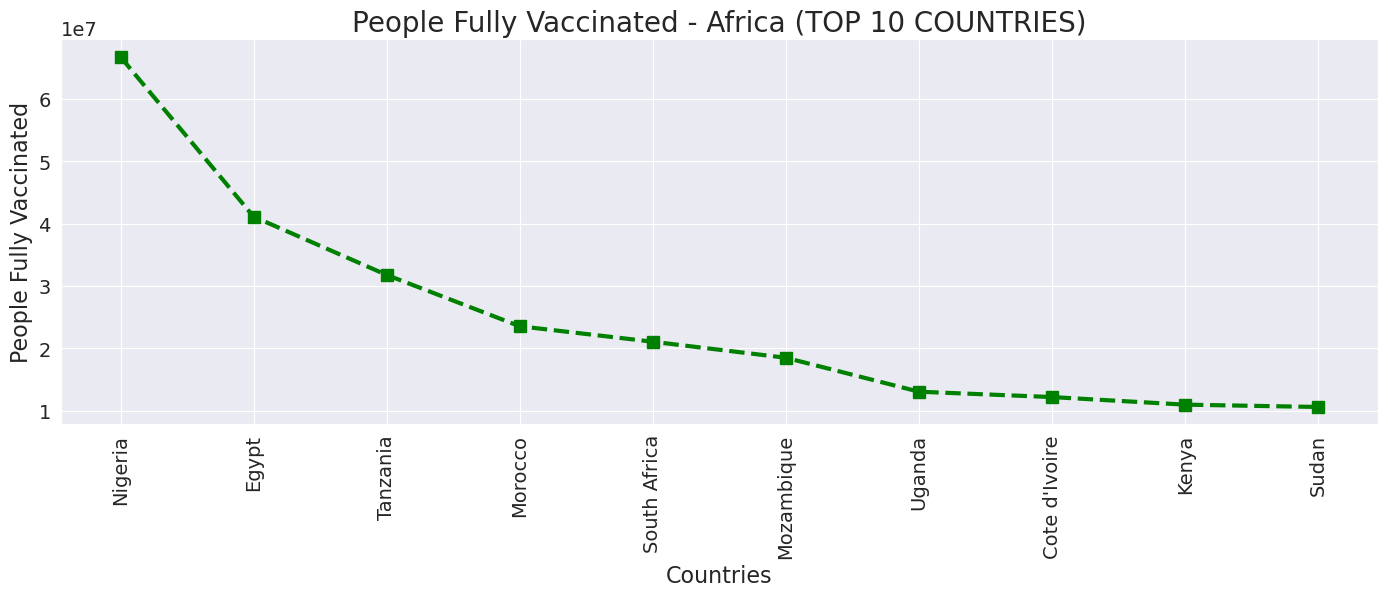

In [36]:
plt.plot(africa10_fullvaccinated['location'], africa10_fullvaccinated['people_fully_vaccinated'], 's--g', lw=3, ms=8)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Fully Vaccinated', fontsize=16)
plt.title('People Fully Vaccinated - Africa (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [37]:
africa10_fullvaccinated

,location,people_fully_vaccinated
0,Nigeria,66717081.0
1,Egypt,41099759.0
2,Tanzania,31753232.0
3,Morocco,23520661.0
4,South Africa,21038797.0
5,Mozambique,18466955.0
6,Uganda,13023635.0
7,Cote d'Ivoire,12164304.0
8,Kenya,10947863.0
9,Sudan,10576238.0


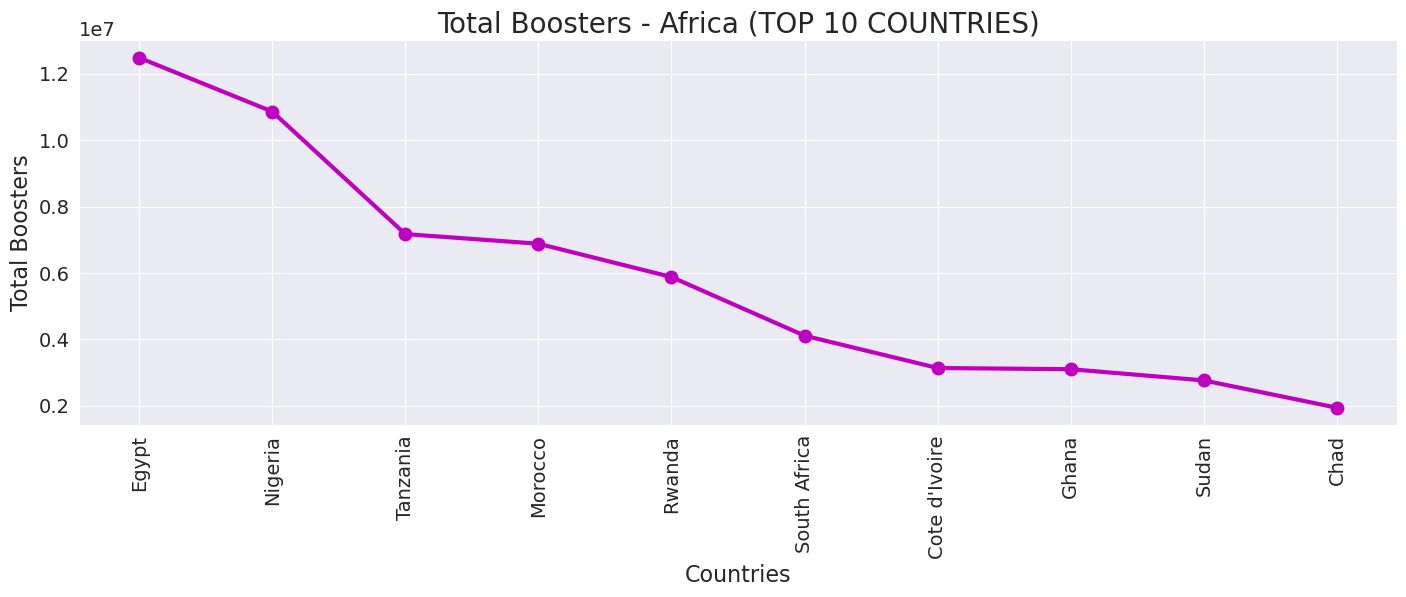

In [38]:
plt.plot(africa10_boosters['location'], africa10_boosters['total_boosters'], 'o-m', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Boosters', fontsize=16)
plt.title('Total Boosters - Africa (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [39]:
africa10_boosters

,location,total_boosters
0,Egypt,12482313.0
1,Nigeria,10859974.0
2,Tanzania,7171363.0
3,Morocco,6880969.0
4,Rwanda,5879013.0
5,South Africa,4112169.0
6,Cote d'Ivoire,3138712.0
7,Ghana,3102301.0
8,Sudan,2765574.0
9,Chad,1942881.0


# ASIA

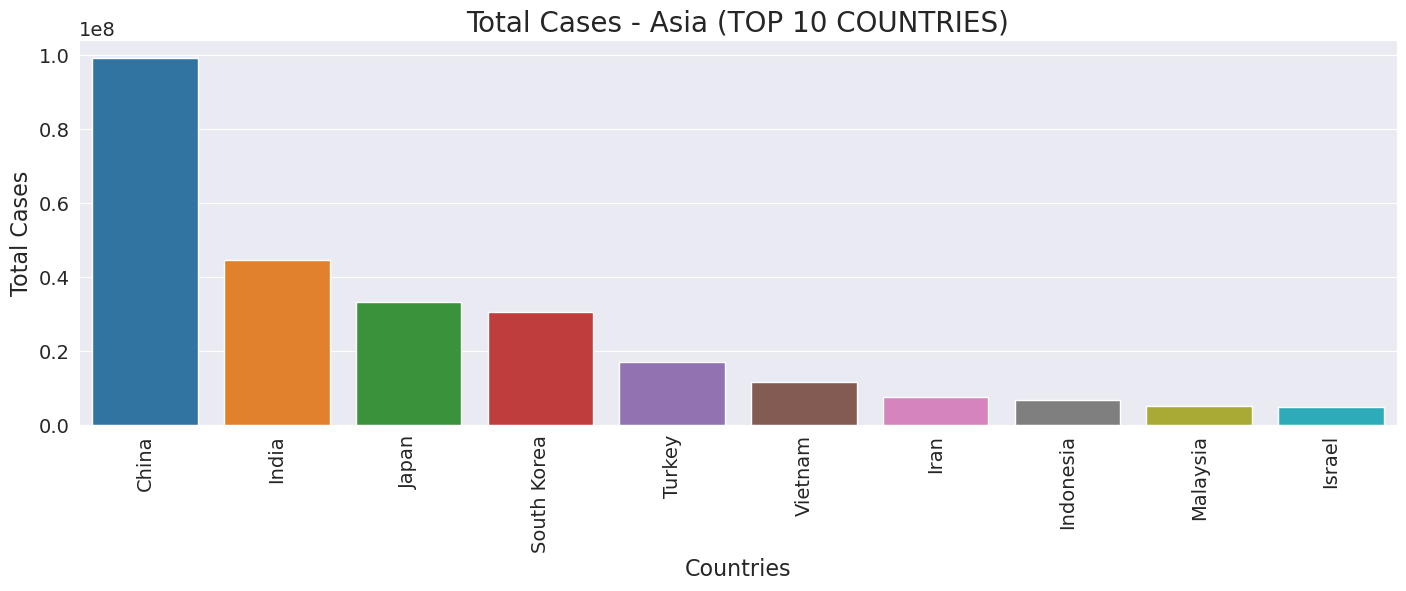

In [40]:
sns.barplot(x='location', y='total_cases', data=asia10_cases)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases', fontsize=16)
plt.title('Total Cases - Asia (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [41]:
asia10_cases

,location,total_cases
0,China,99109603.0
1,India,44688367.0
2,Japan,33264491.0
3,South Korea,30581499.0
4,Turkey,17004677.0
5,Vietnam,11526966.0
6,Iran,7570743.0
7,Indonesia,6737606.0
8,Malaysia,5043978.0
9,Israel,4801511.0


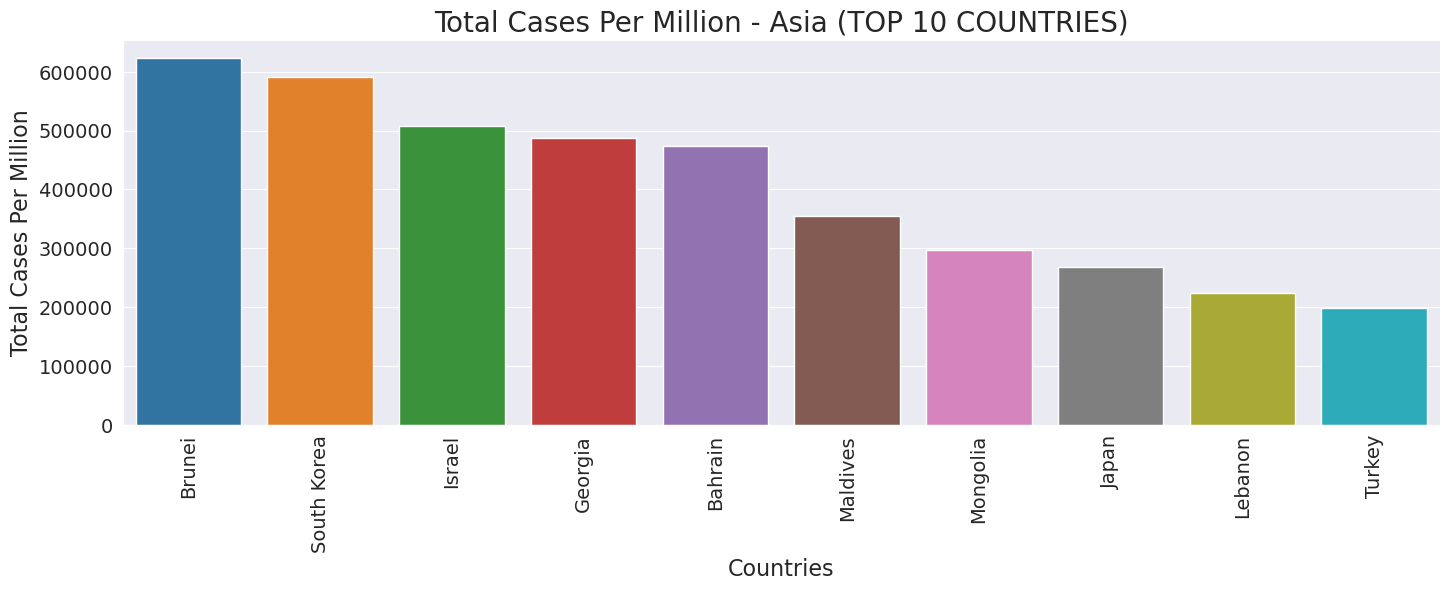

In [42]:
sns.barplot(x='location', y='total_cases_per_million', data=asia10_casespm)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases Per Million', fontsize=16)
plt.title('Total Cases Per Million - Asia (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [43]:
asia10_casespm

,location,total_cases_per_million
0,Brunei,622850.232
1,South Korea,590196.316
2,Israel,508150.175
3,Georgia,488074.009
4,Bahrain,473167.024
5,Maldives,354598.528
6,Mongolia,296583.100
7,Japan,268366.566
8,Lebanon,224512.655
9,Turkey,199255.078


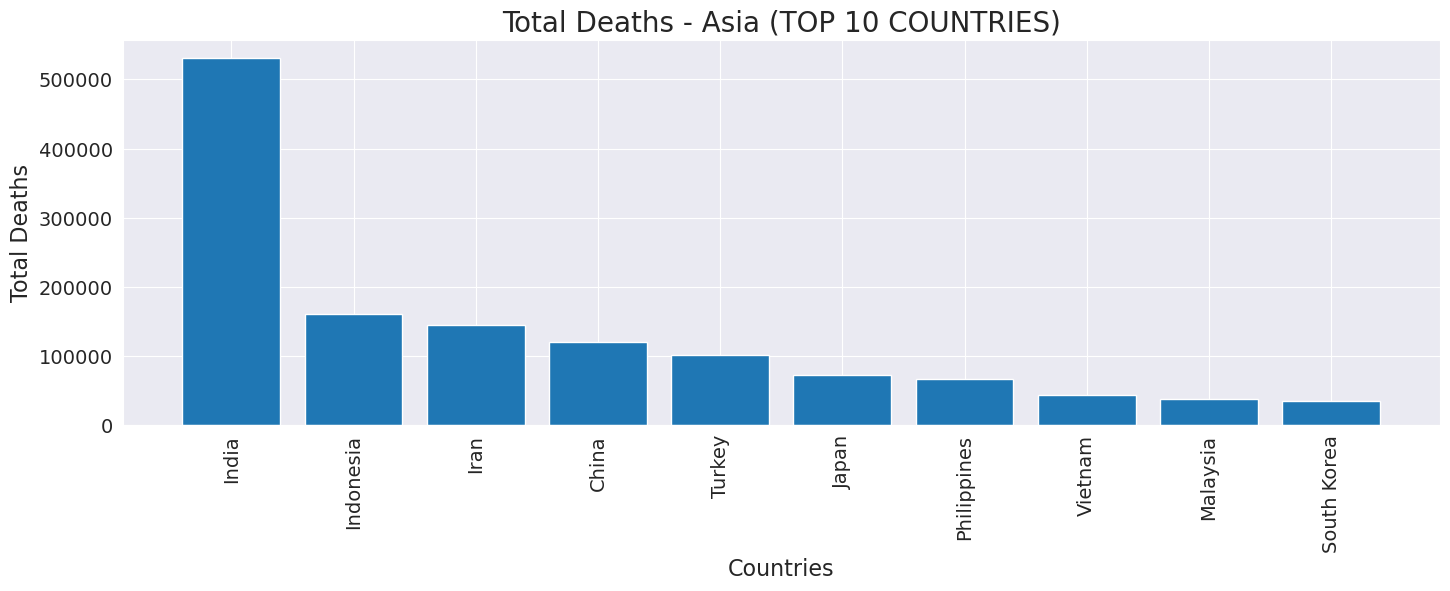

In [44]:
plt.bar(asia10_deaths['location'], asia10_deaths['total_deaths'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.title('Total Deaths - Asia (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [45]:
asia10_deaths

,location,total_deaths
0,India,530775.0
1,Indonesia,160934.0
2,Iran,144902.0
3,China,120227.0
4,Turkey,101419.0
5,Japan,72805.0
6,Philippines,66160.0
7,Vietnam,43186.0
8,Malaysia,36966.0
9,South Korea,34049.0


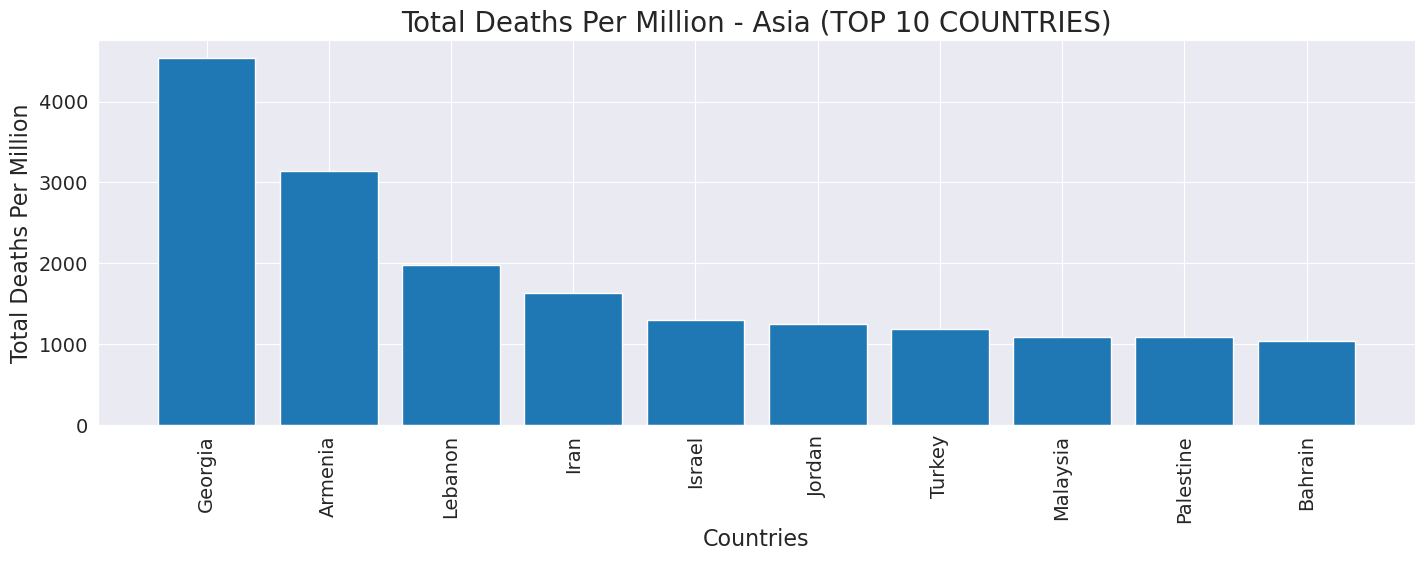

In [46]:
plt.bar(asia10_deathspm['location'], asia10_deathspm['total_deaths_per_million'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths Per Million', fontsize=16)
plt.title('Total Deaths Per Million - Asia (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [47]:
asia10_deathspm

,location,total_deaths_per_million
0,Georgia,4532.386
1,Armenia,3138.676
2,Lebanon,1974.591
3,Iran,1636.376
4,Israel,1302.466
5,Jordan,1251.299
6,Turkey,1188.394
7,Malaysia,1089.215
8,Palestine,1087.222
9,Bahrain,1043.310


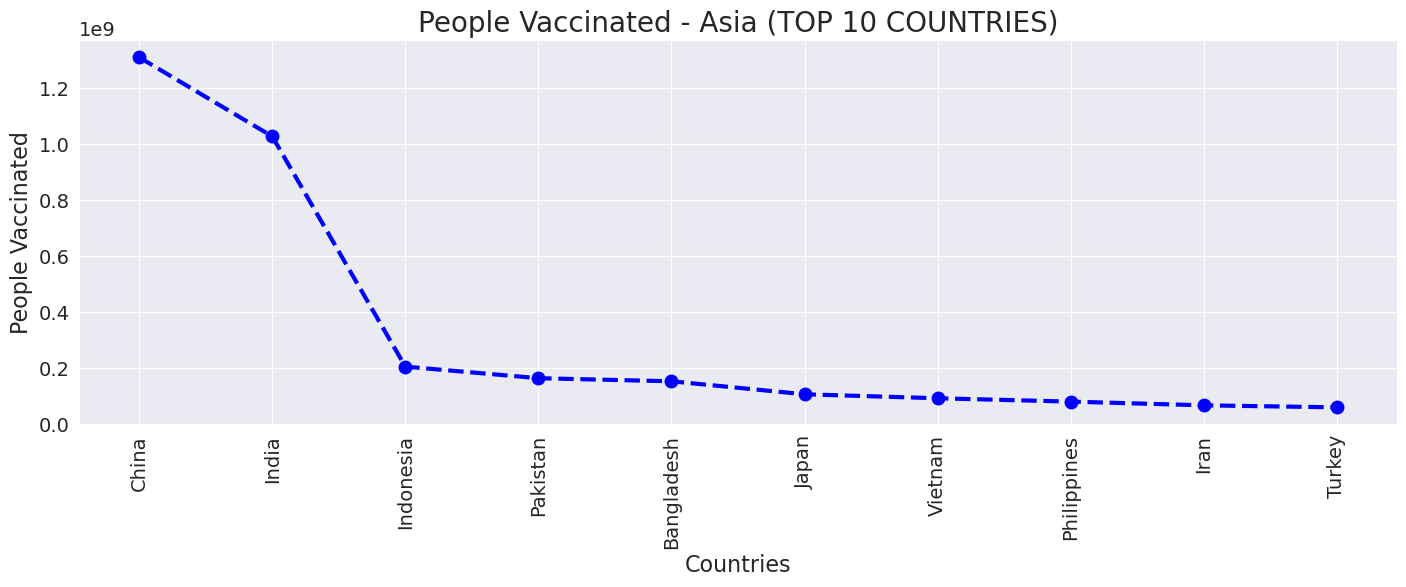

In [48]:
plt.plot(asia10_vaccinated['location'], asia10_vaccinated['people_vaccinated'], 'o--b', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Vaccinated', fontsize=16)
plt.title('People Vaccinated - Asia (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [49]:
asia10_vaccinated

,location,people_vaccinated
0,China,1.310292e+09
1,India,1.027380e+09
2,Indonesia,2.036575e+08
3,Pakistan,1.622197e+08
4,Bangladesh,1.511904e+08
5,Japan,1.046759e+08
6,Vietnam,9.046695e+07
7,Philippines,7.847266e+07
8,Iran,6.515977e+07
9,Turkey,5.794105e+07


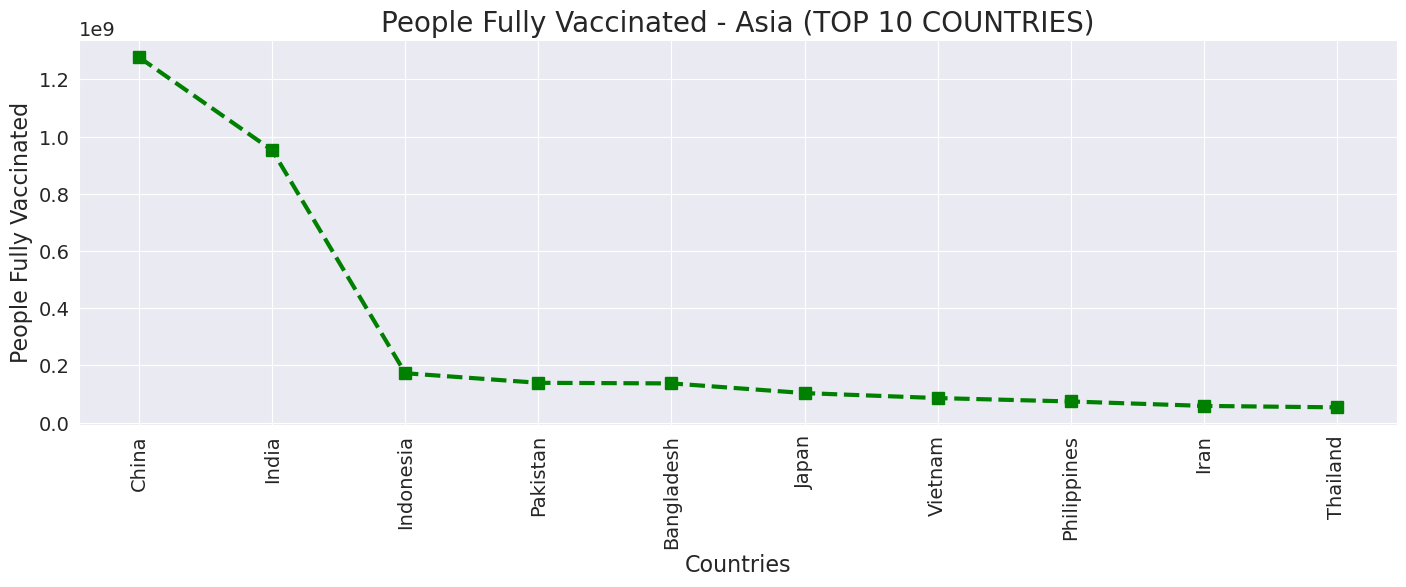

In [50]:
plt.plot(asia10_fullvaccinated['location'], asia10_fullvaccinated['people_fully_vaccinated'], 's--g', lw=3, ms=8)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Fully Vaccinated', fontsize=16)
plt.title('People Fully Vaccinated - Asia (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [51]:
asia10_fullvaccinated

,location,people_fully_vaccinated
0,China,1.276760e+09
1,India,9.518977e+08
2,Indonesia,1.726933e+08
3,Pakistan,1.392279e+08
4,Bangladesh,1.371393e+08
5,Japan,1.033301e+08
6,Vietnam,8.593192e+07
7,Philippines,7.403167e+07
8,Iran,5.854448e+07
9,Thailand,5.348609e+07


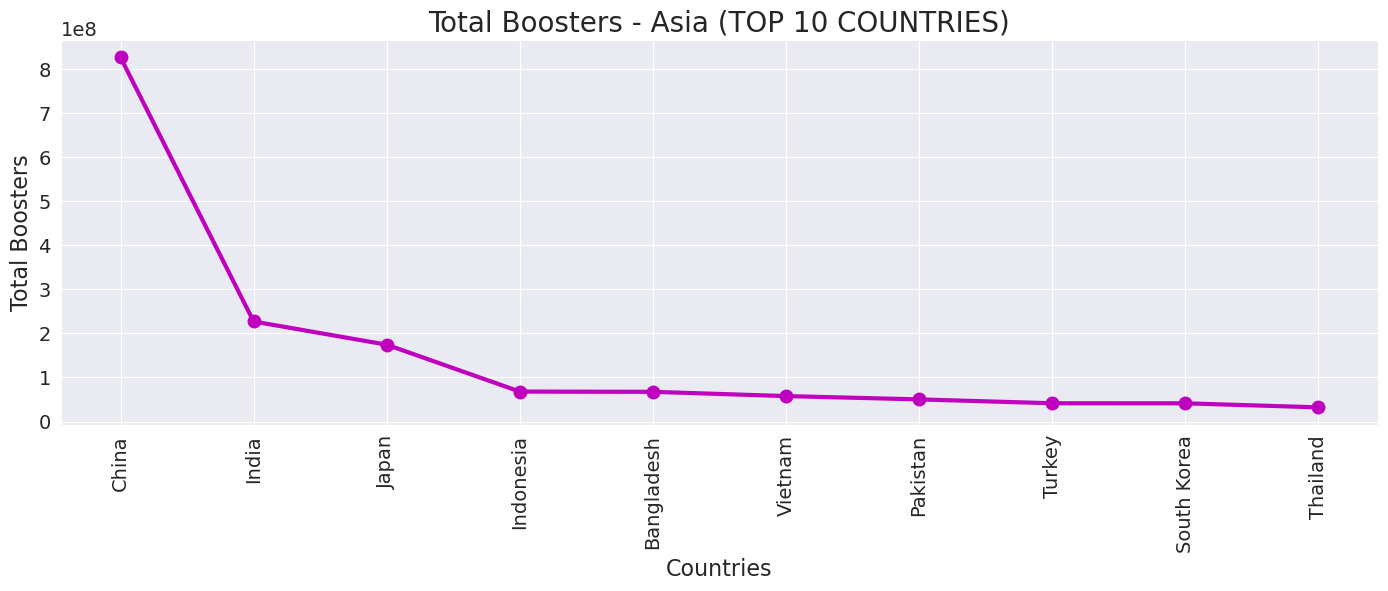

In [52]:
plt.plot(asia10_boosters['location'], asia10_boosters['total_boosters'], 'o-m', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Boosters', fontsize=16)
plt.title('Total Boosters - Asia (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [53]:
asia10_boosters

,location,total_boosters
0,China,826913000.0
1,India,227127482.0
2,Japan,174409558.0
3,Indonesia,67952274.0
4,Bangladesh,67395241.0
5,Vietnam,57752910.0
6,Pakistan,50209716.0
7,Turkey,41425329.0
8,South Korea,41325954.0
9,Thailand,32143431.0


# Europe

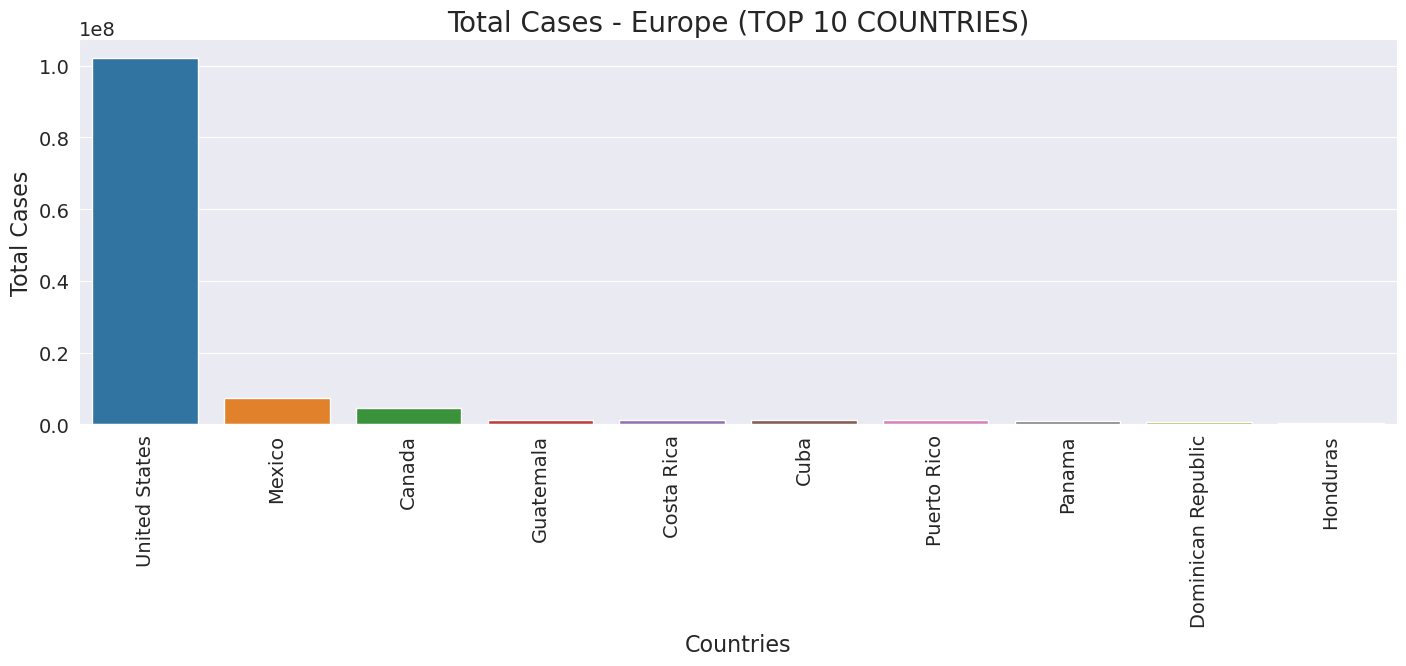

In [54]:
sns.barplot(x='location', y='total_cases', data=nam10_cases)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases', fontsize=16)
plt.title('Total Cases - Europe (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [55]:
europe10_cases

,location,total_cases
0,France,38538948.0
1,Germany,38221663.0
2,Italy,25603510.0
3,United Kingdom,24396534.0
4,Russia,22363740.0
5,Spain,13770429.0
6,Netherlands,8598182.0
7,Poland,6437598.0
8,Austria,5943417.0
9,Greece,5896788.0


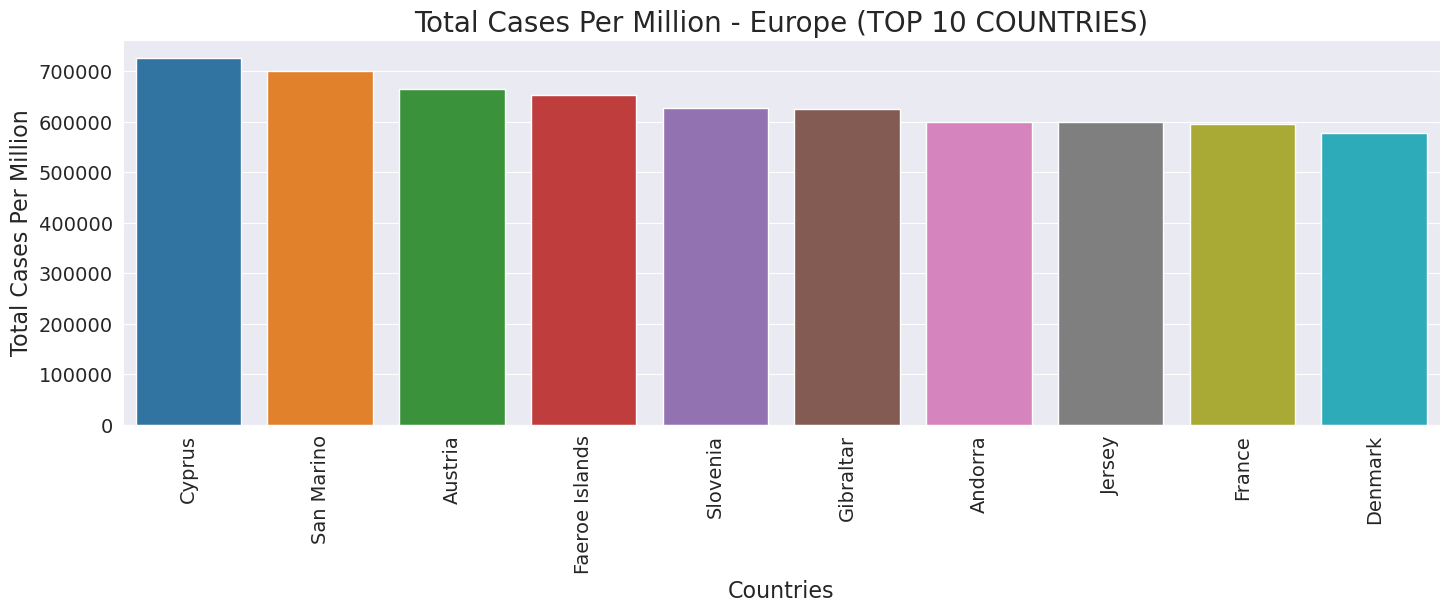

In [56]:
sns.barplot(x='location', y='total_cases_per_million', data=europe10_casespm)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases Per Million', fontsize=16)
plt.title('Total Cases Per Million - Europe (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [57]:
europe10_casespm

,location,total_cases_per_million
0,Cyprus,726205.264
1,San Marino,700979.519
2,Austria,664840.227
3,Faeroe Islands,652484.139
4,Slovenia,627713.467
5,Gibraltar,625302.200
6,Andorra,599802.112
7,Jersey,599218.383
8,France,596332.372
9,Denmark,578682.102


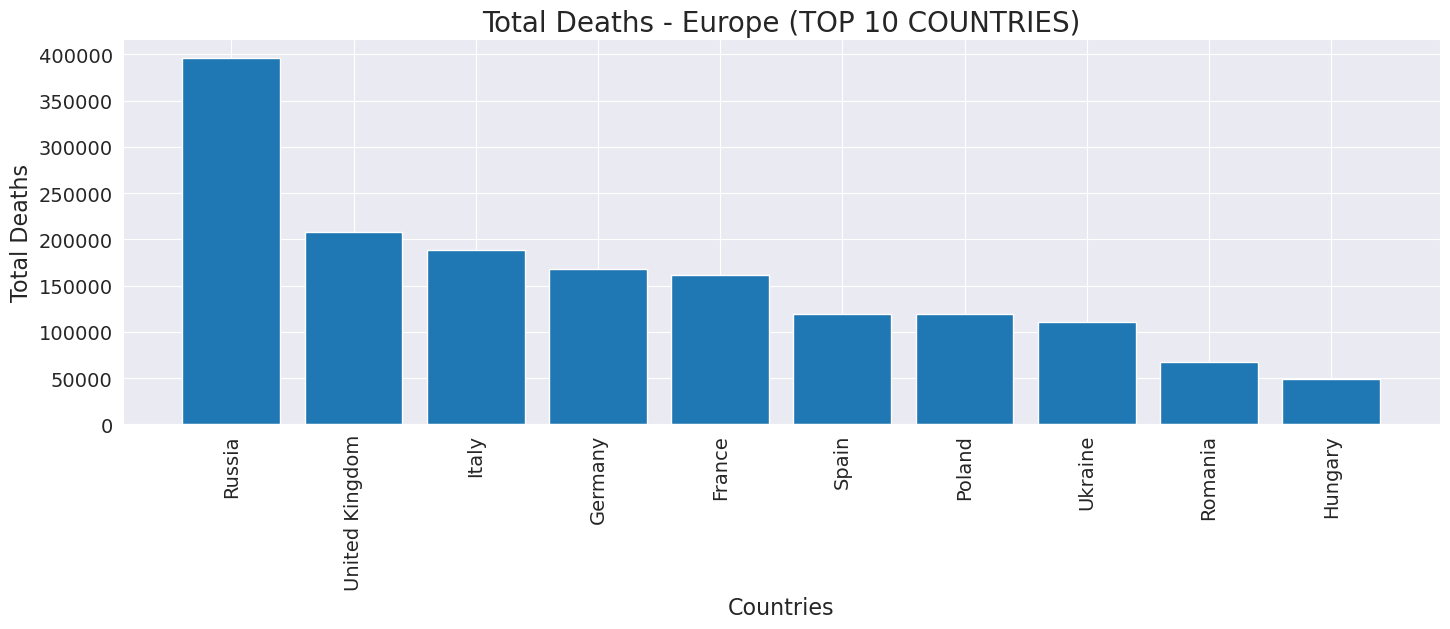

In [58]:
plt.bar(europe10_deaths['location'], europe10_deaths['total_deaths'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.title('Total Deaths - Europe (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [59]:
europe10_deaths

,location,total_deaths
0,Russia,396378.0
1,United Kingdom,207695.0
2,Italy,188322.0
3,Germany,168583.0
4,France,161397.0
5,Spain,119479.0
6,Poland,118970.0
7,Ukraine,111298.0
8,Romania,67736.0
9,Hungary,48651.0


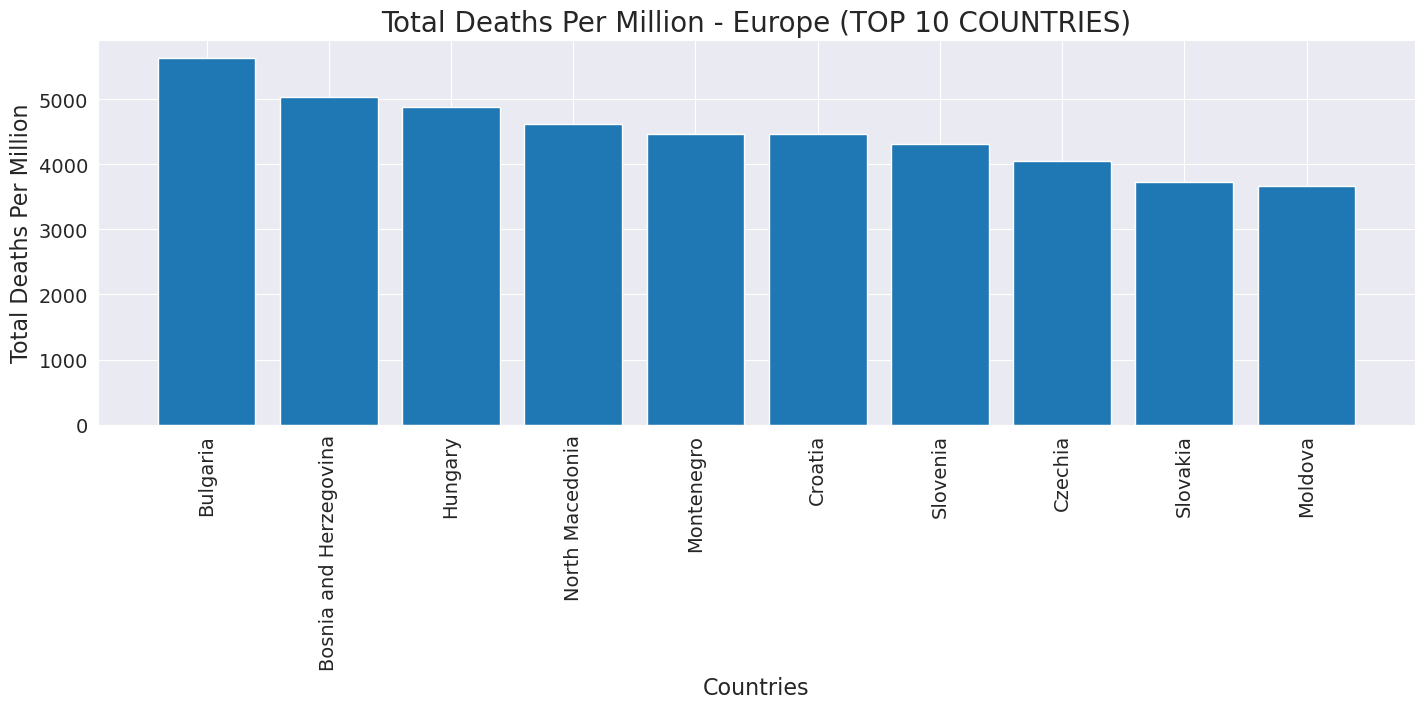

In [60]:
plt.bar(europe10_deathspm['location'], europe10_deathspm['total_deaths_per_million'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths Per Million', fontsize=16)
plt.title('Total Deaths Per Million - Europe (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [61]:
europe10_deathspm

,location,total_deaths_per_million
0,Bulgaria,5635.396
1,Bosnia and Herzegovina,5034.745
2,Hungary,4881.059
3,North Macedonia,4615.004
4,Montenegro,4473.099
5,Croatia,4462.876
6,Slovenia,4316.357
7,Czechia,4048.412
8,Slovakia,3726.618
9,Moldova,3667.286


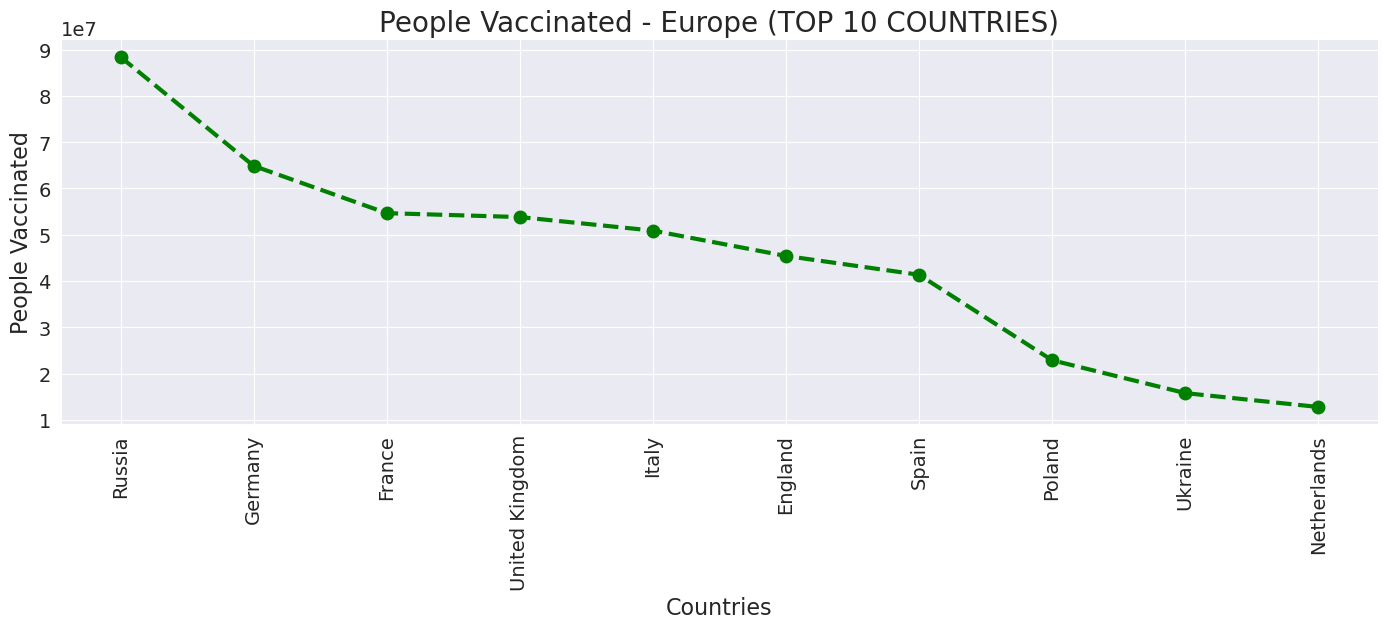

In [62]:
plt.plot(europe10_vaccinated['location'], europe10_vaccinated['people_vaccinated'], 'o--g', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Vaccinated', fontsize=16)
plt.title('People Vaccinated - Europe (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [63]:
europe10_vaccinated

,location,people_vaccinated
0,Russia,88407826.0
1,Germany,64873056.0
2,France,54659622.0
3,United Kingdom,53813491.0
4,Italy,50885802.0
5,England,45410567.0
6,Spain,41343396.0
7,Poland,22870823.0
8,Ukraine,15774300.0
9,Netherlands,12775557.0


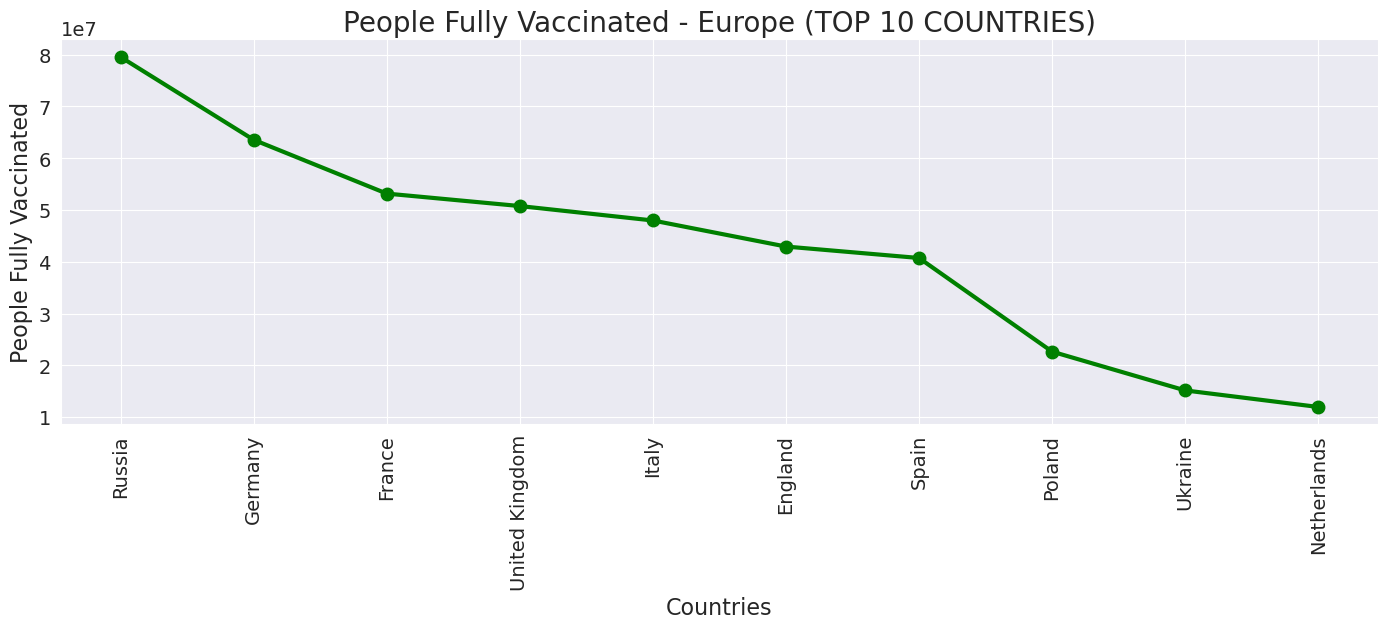

In [64]:
plt.plot(europe10_fullvaccinated['location'], europe10_fullvaccinated['people_fully_vaccinated'], 'o-g', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Fully Vaccinated', fontsize=16)
plt.title('People Fully Vaccinated - Europe (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [65]:
europe10_fullvaccinated

,location,people_fully_vaccinated
0,Russia,79554468.0
1,Germany,63559676.0
2,France,53169000.0
3,United Kingdom,50762968.0
4,Italy,47976165.0
5,England,42939917.0
6,Spain,40730568.0
7,Poland,22642606.0
8,Ukraine,15153577.0
9,Netherlands,11957652.0


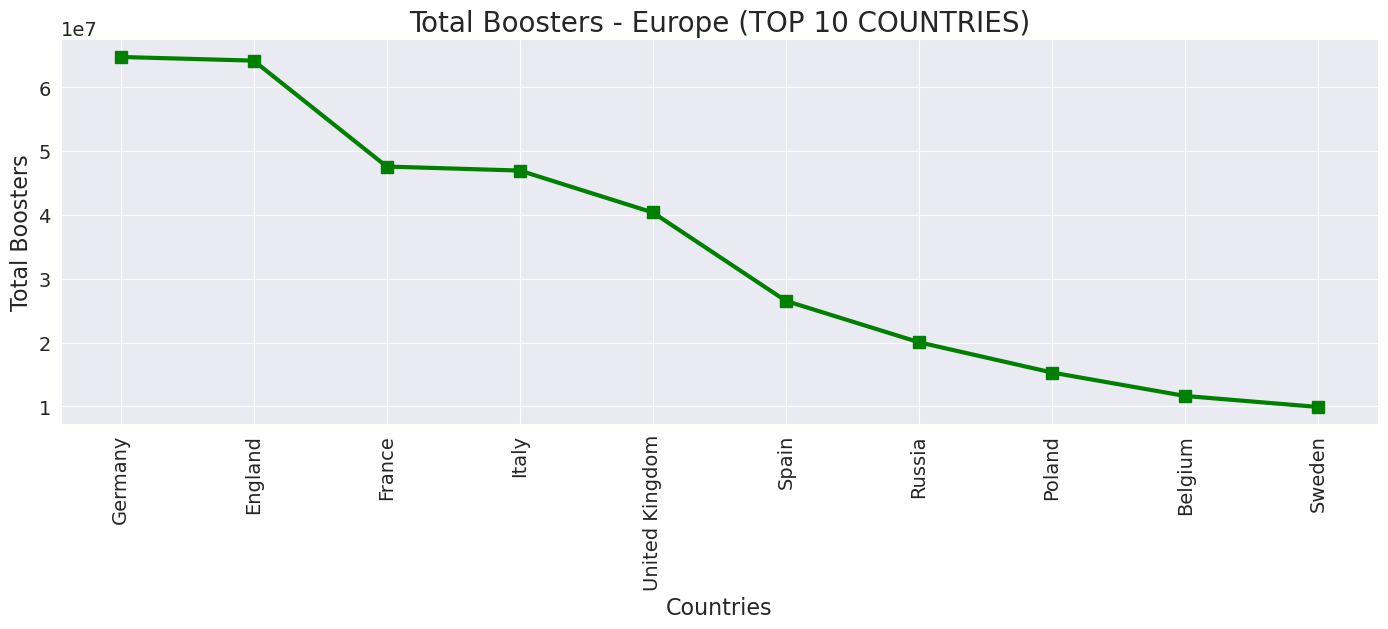

In [66]:
plt.plot(europe10_boosters['location'], europe10_boosters['total_boosters'], 's-g', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Boosters', fontsize=16)
plt.title('Total Boosters - Europe (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [67]:
europe10_boosters

,location,total_boosters
0,Germany,64746681.0
1,England,64173818.0
2,France,47575661.0
3,Italy,46946017.0
4,United Kingdom,40373987.0
5,Spain,26517510.0
6,Russia,20032359.0
7,Poland,15293093.0
8,Belgium,11621275.0
9,Sweden,9898239.0


# North America

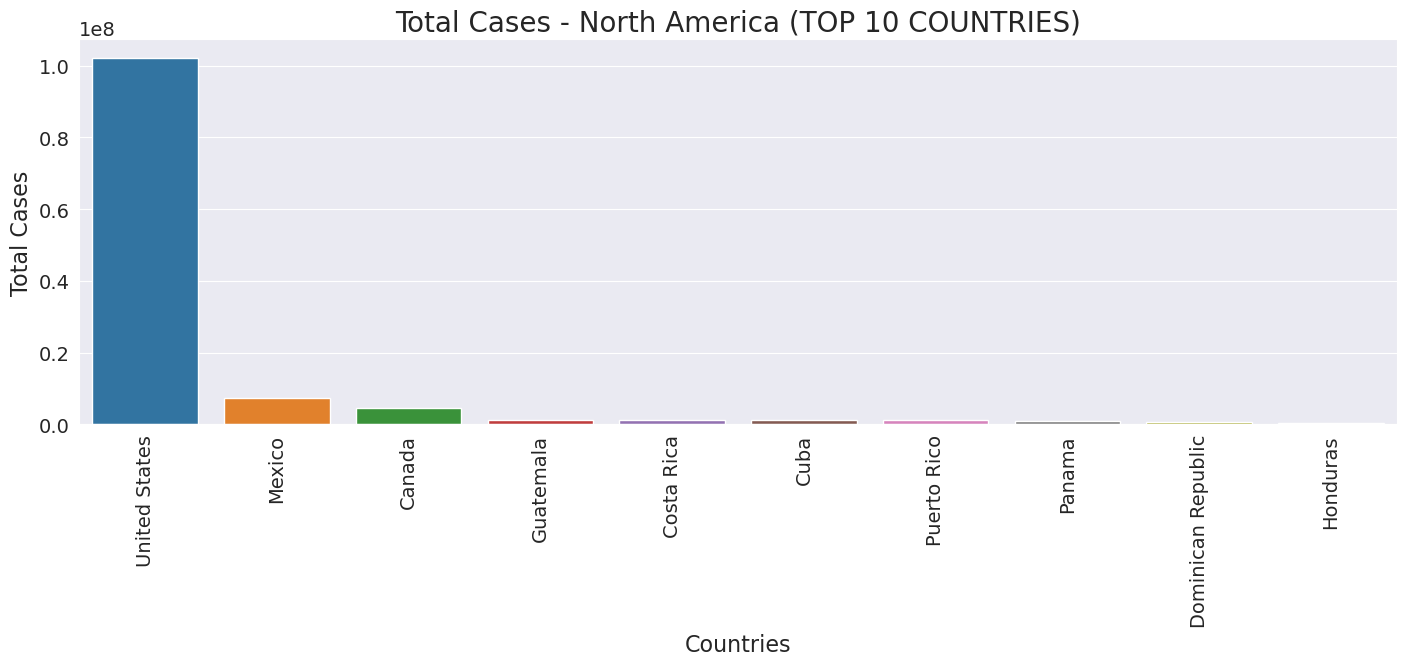

In [68]:
sns.barplot(x='location', y='total_cases', data=nam10_cases)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases', fontsize=16)
plt.title('Total Cases - North America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [69]:
nam10_cases

,location,total_cases
0,United States,102247392.0
1,Mexico,7470653.0
2,Canada,4600615.0
3,Guatemala,1237564.0
4,Costa Rica,1209725.0
5,Cuba,1112631.0
6,Puerto Rico,1100123.0
7,Panama,1031731.0
8,Dominican Republic,660790.0
9,Honduras,472219.0


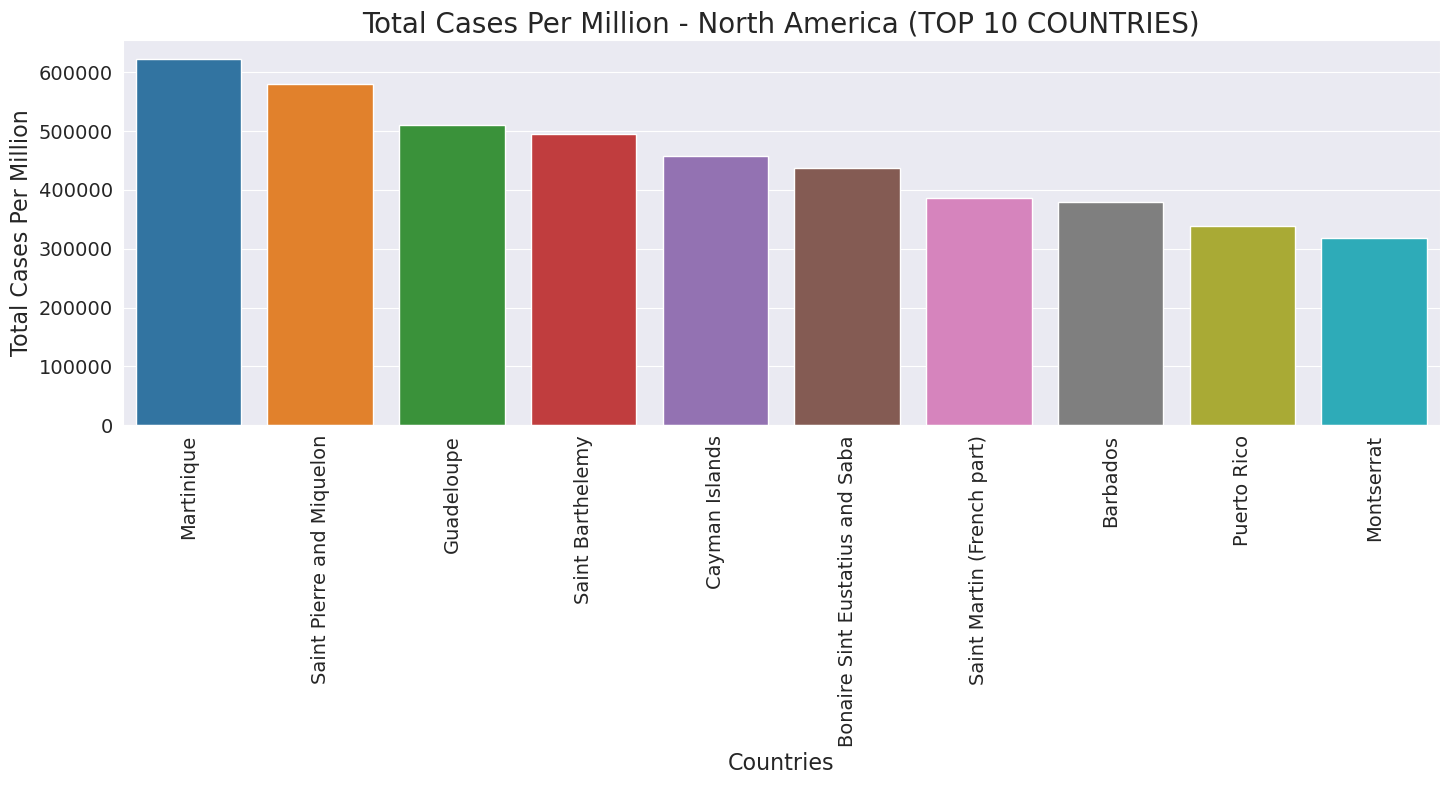

In [70]:
sns.barplot(x='location', y='total_cases_per_million', data=nam10_casespm)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases Per Million', fontsize=16)
plt.title('Total Cases Per Million - North America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [71]:
nam10_casespm

,location,total_cases_per_million
0,Martinique,623163.325
1,Saint Pierre and Miquelon,580288.870
2,Guadeloupe,510119.718
3,Saint Barthelemy,494906.313
4,Cayman Islands,457961.061
5,Bonaire Sint Eustatius and Saba,436344.817
6,Saint Martin (French part),385686.447
7,Barbados,378649.084
8,Puerto Rico,338248.352
9,Montserrat,317924.315


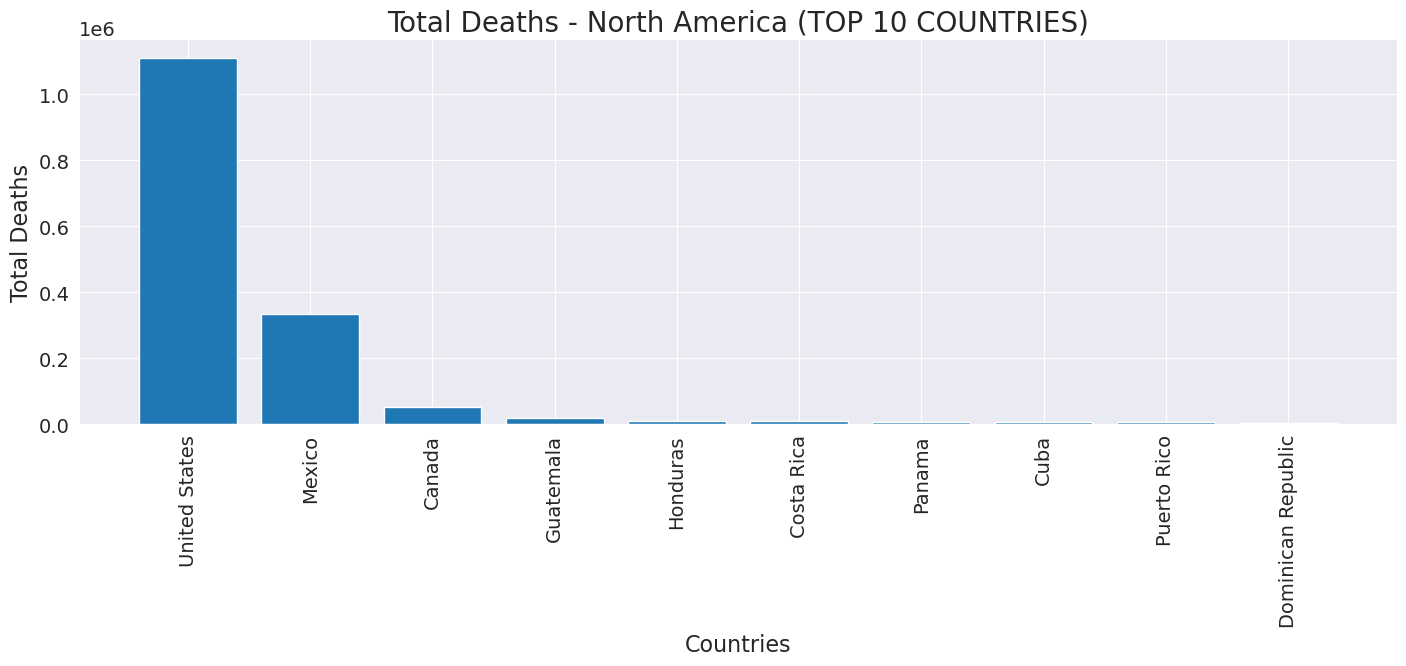

In [72]:
plt.bar(nam10_deaths['location'], nam10_deaths['total_deaths'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.title('Total Deaths - North America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [73]:
nam10_deaths

,location,total_deaths
0,United States,1111342.0
1,Mexico,333100.0
2,Canada,51447.0
3,Guatemala,20178.0
4,Honduras,11111.0
5,Costa Rica,9245.0
6,Panama,8609.0
7,Cuba,8530.0
8,Puerto Rico,5810.0
9,Dominican Republic,4384.0


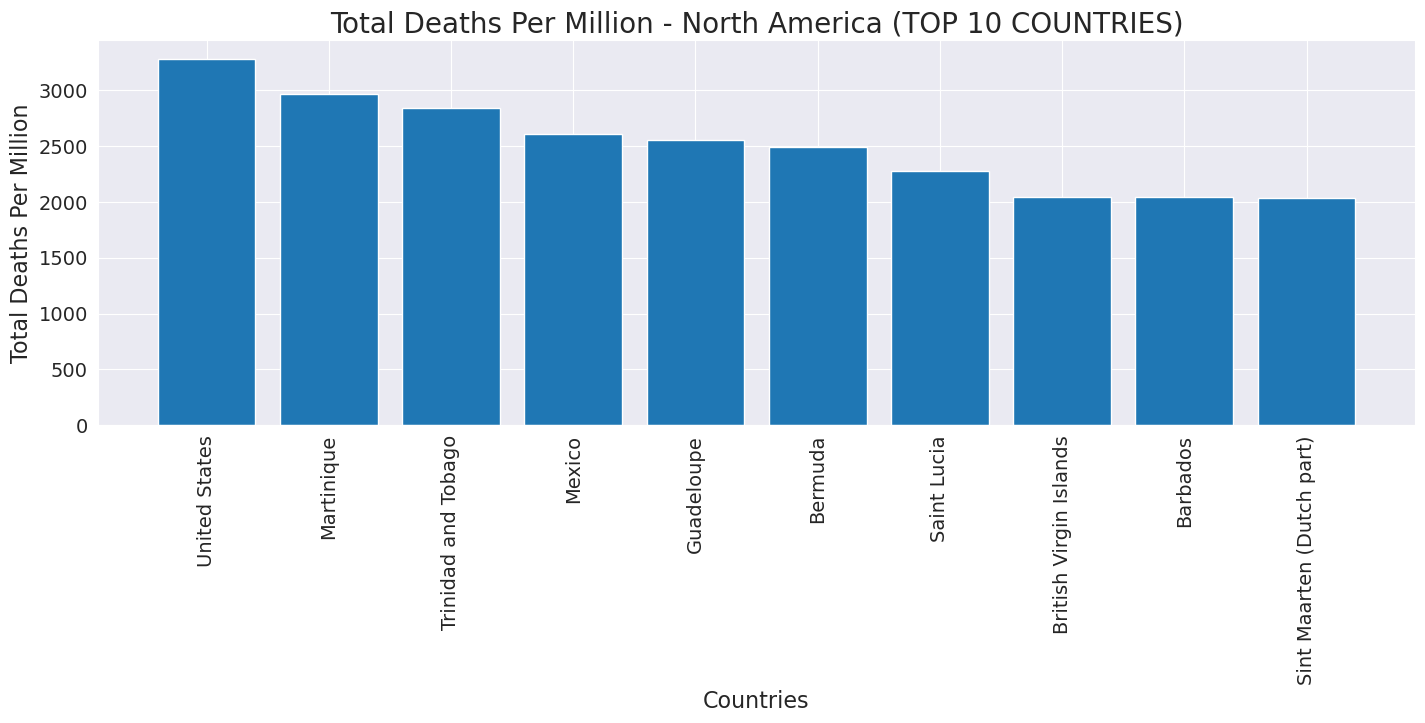

In [74]:
plt.bar(nam10_deathspm['location'], nam10_deathspm['total_deaths_per_million'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths Per Million', fontsize=16)
plt.title('Total Deaths Per Million - North America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [75]:
nam10_deathspm

,location,total_deaths_per_million
0,United States,3285.177
1,Martinique,2971.332
2,Trinidad and Tobago,2839.241
3,Mexico,2612.465
4,Guadeloupe,2552.039
5,Bermuda,2491.940
6,Saint Lucia,2273.839
7,British Virgin Islands,2042.640
8,Barbados,2041.570
9,Sint Maarten (Dutch part),2036.568


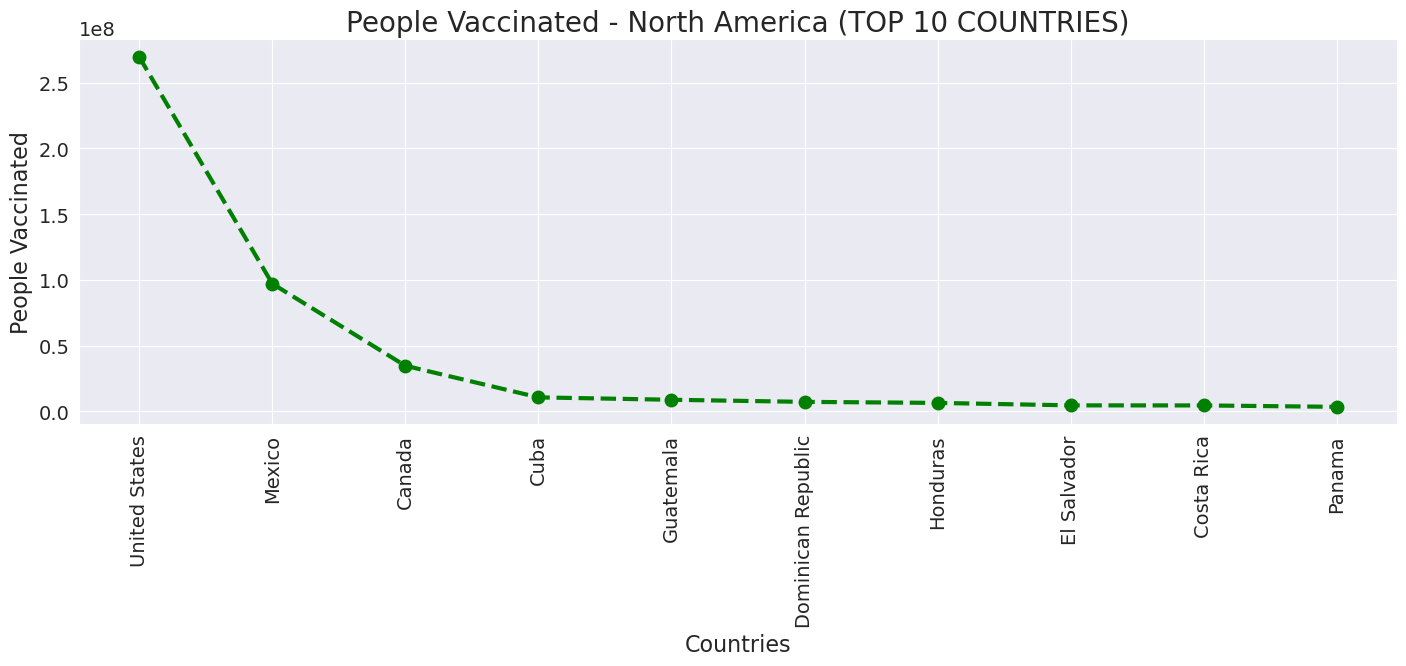

In [76]:
plt.plot(nam10_vaccinated['location'], nam10_vaccinated['people_vaccinated'], 'o--g', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Vaccinated', fontsize=16)
plt.title('People Vaccinated - North America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [77]:
nam10_vaccinated

,location,people_vaccinated
0,United States,269554116.0
1,Mexico,97179493.0
2,Canada,34763194.0
3,Cuba,10729208.0
4,Guatemala,8912320.0
5,Dominican Republic,7310612.0
6,Honduras,6521901.0
7,El Salvador,4652597.0
8,Costa Rica,4605172.0
9,Panama,3526529.0


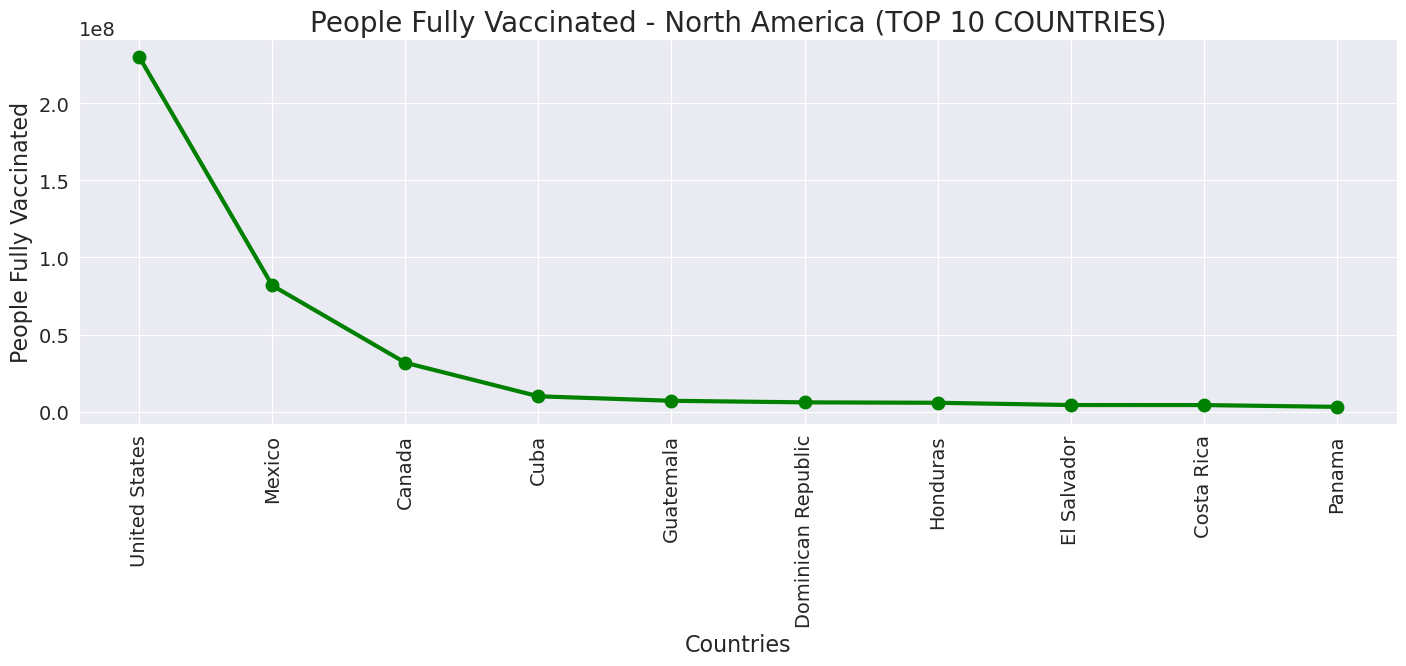

In [78]:
plt.plot(nam10_fullvaccinated['location'], nam10_fullvaccinated['people_fully_vaccinated'], 'o-g', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Fully Vaccinated', fontsize=16)
plt.title('People Fully Vaccinated - North America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [79]:
nam10_fullvaccinated

,location,people_fully_vaccinated
0,United States,230075934.0
1,Mexico,81849962.0
2,Canada,31762130.0
3,Cuba,10008865.0
4,Guatemala,7099590.0
5,Dominican Republic,6083458.0
6,Honduras,5811805.0
7,El Salvador,4344286.0
8,Costa Rica,4314443.0
9,Panama,3168992.0


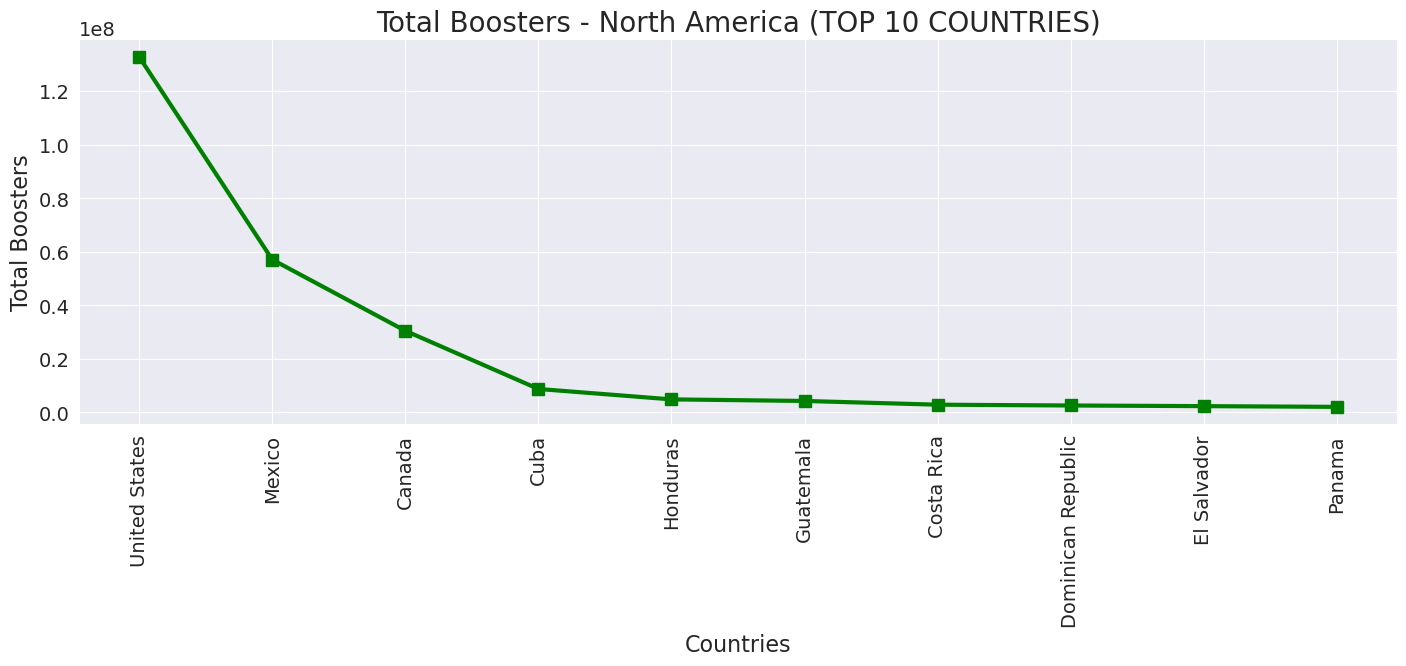

In [80]:
plt.plot(nam10_boosters['location'], nam10_boosters['total_boosters'], 's-g', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Boosters', fontsize=16)
plt.title('Total Boosters - North America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [81]:
nam10_boosters

,location,total_boosters
0,United States,132741077.0
1,Mexico,57026630.0
2,Canada,30431178.0
3,Cuba,8705576.0
4,Honduras,4813249.0
5,Guatemala,4230402.0
6,Costa Rica,2832234.0
7,Dominican Republic,2535712.0
8,El Salvador,2292292.0
9,Panama,2027869.0


# South America

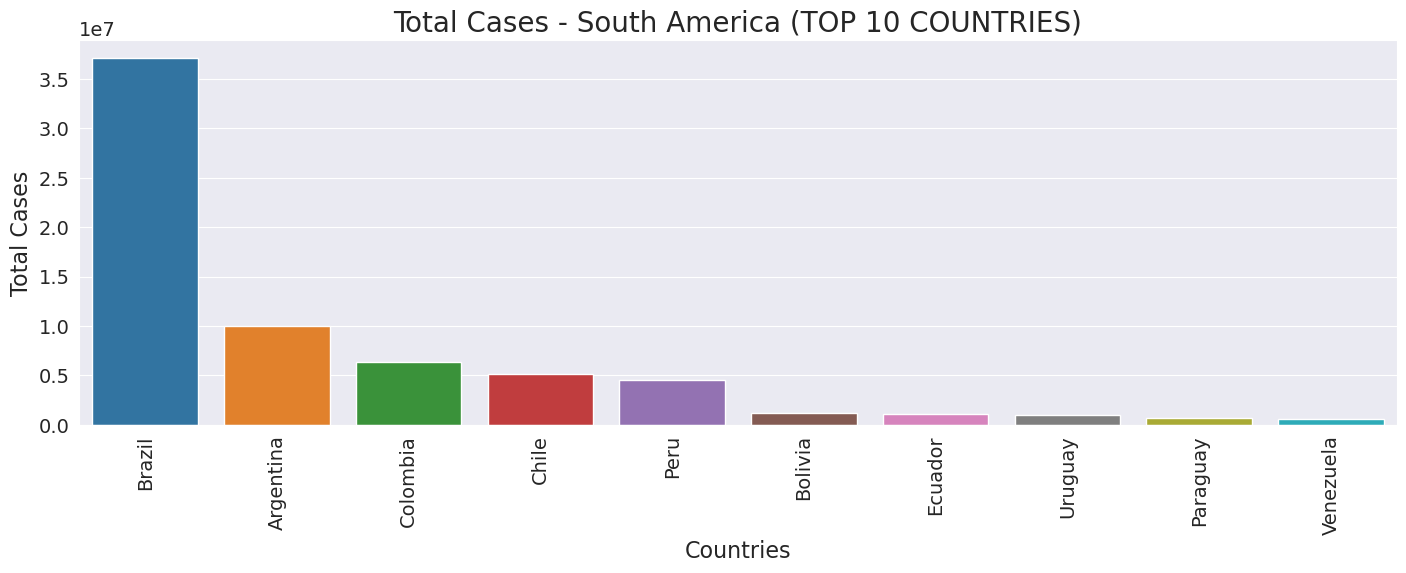

In [82]:
sns.barplot(x='location', y='total_cases', data=sam10_cases)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases', fontsize=16)
plt.title('Total Cases - South America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [83]:
sam10_cases

,location,total_cases
0,Brazil,37076053.0
1,Argentina,10044957.0
2,Colombia,6360089.0
3,Chile,5182360.0
4,Peru,4486832.0
5,Bolivia,1193970.0
6,Ecuador,1057121.0
7,Uruguay,1034303.0
8,Paraguay,735709.0
9,Venezuela,552125.0


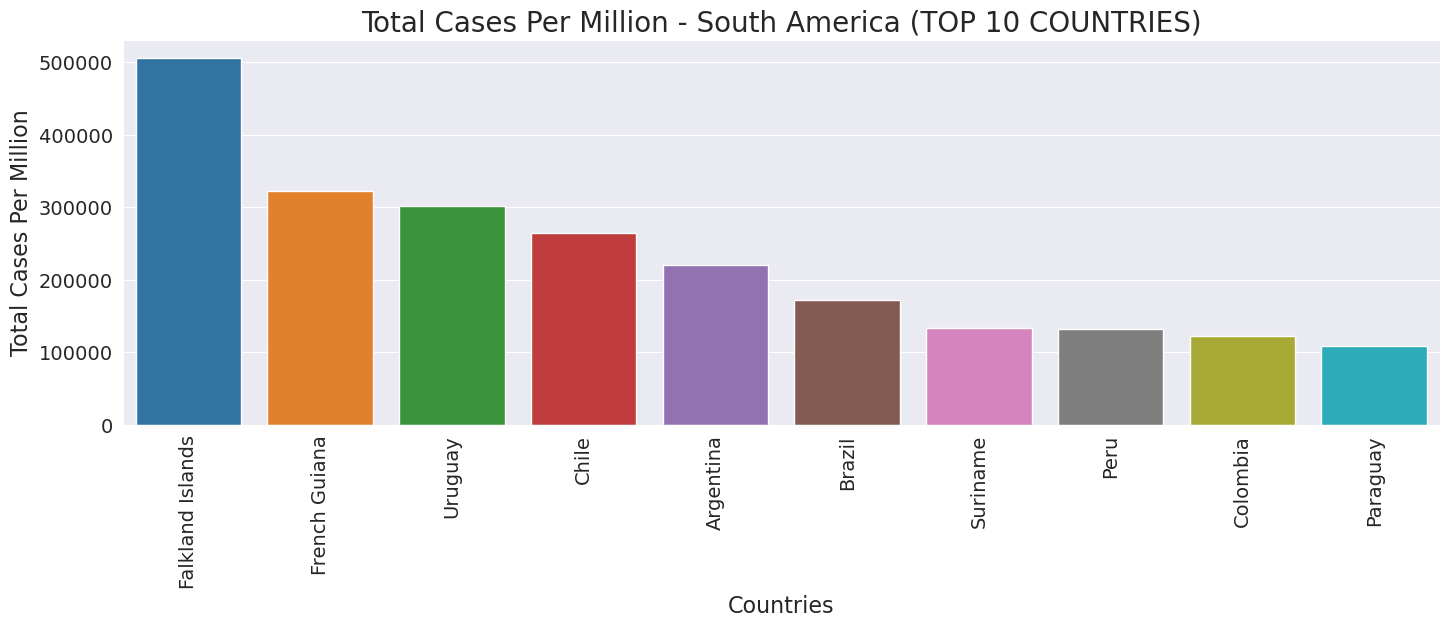

In [84]:
sns.barplot(x='location', y='total_cases_per_million', data=sam10_casespm)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases Per Million', fontsize=16)
plt.title('Total Cases Per Million - South America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [85]:
sam10_casespm

,location,total_cases_per_million
0,Falkland Islands,505919.495
1,French Guiana,321901.841
2,Uruguay,302180.732
3,Chile,264355.733
4,Argentina,220718.205
5,Brazil,172195.670
6,Suriname,133431.816
7,Peru,131773.459
8,Colombia,122606.423
9,Paraguay,108499.730


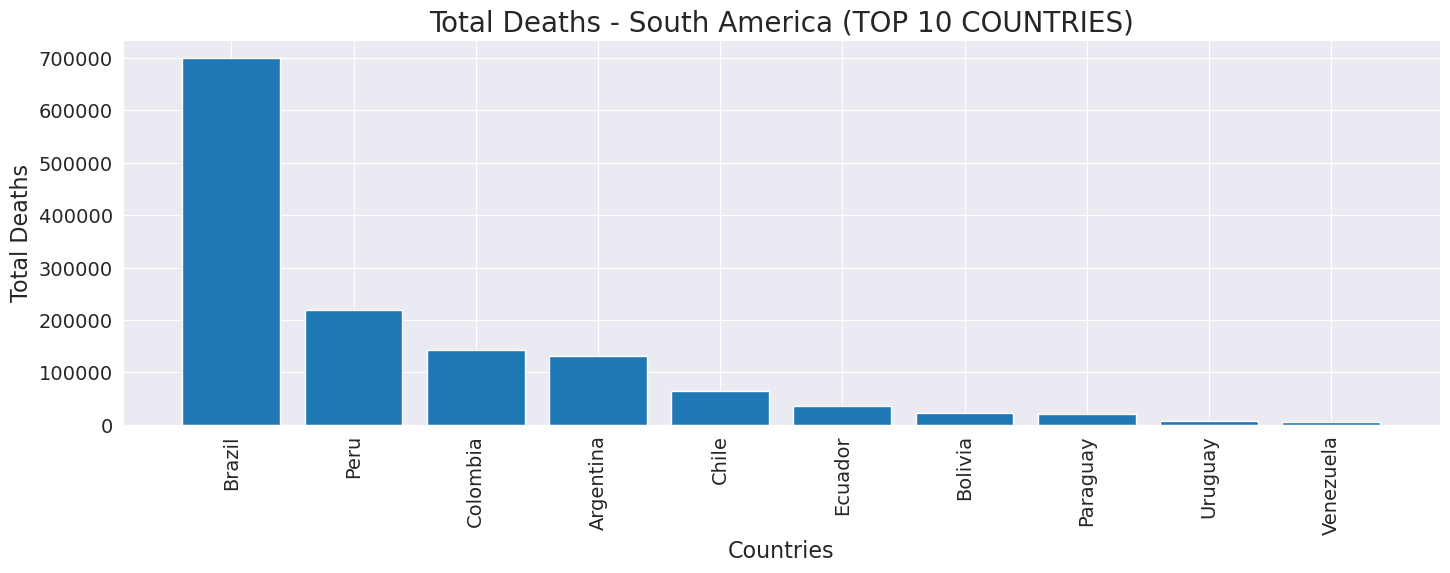

In [86]:
plt.bar(sam10_deaths['location'], sam10_deaths['total_deaths'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.title('Total Deaths - South America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [87]:
sam10_deaths

,location,total_deaths
0,Brazil,699276.0
1,Peru,219493.0
2,Colombia,142629.0
3,Argentina,130472.0
4,Chile,64247.0
5,Ecuador,36014.0
6,Bolivia,22365.0
7,Paraguay,19878.0
8,Uruguay,7617.0
9,Venezuela,5854.0


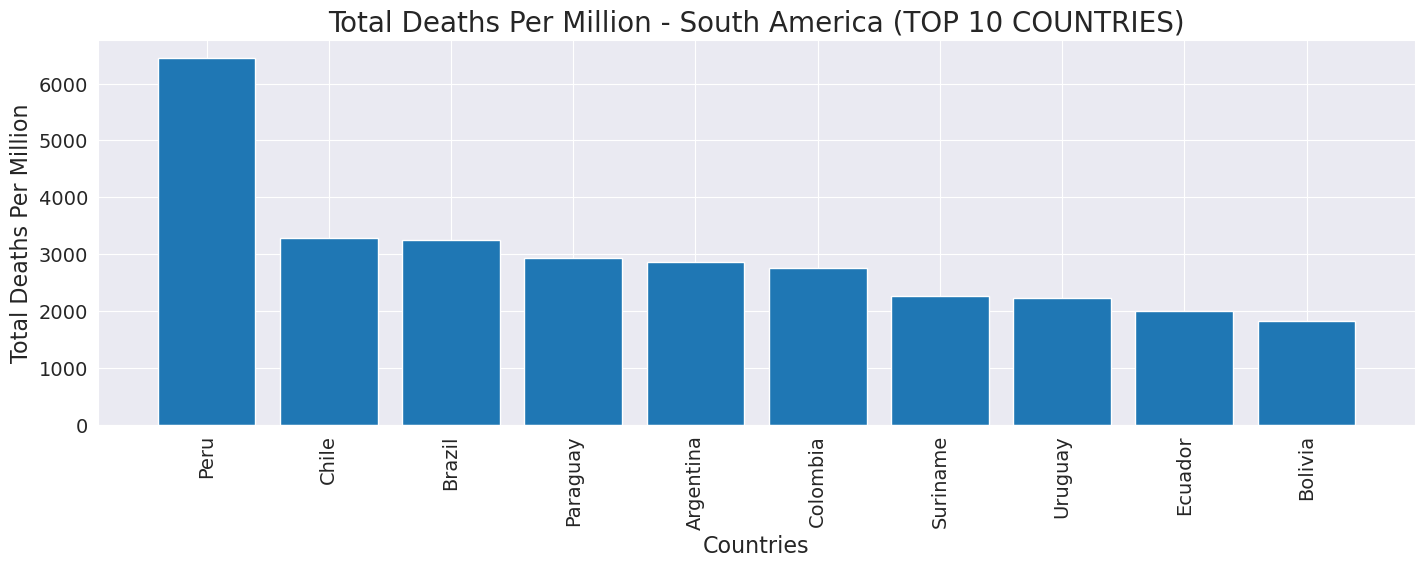

In [88]:
plt.bar(sam10_deathspm['location'], sam10_deathspm['total_deaths_per_million'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths Per Million', fontsize=16)
plt.title('Total Deaths Per Million - South America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [89]:
sam10_deathspm

,location,total_deaths_per_million
0,Peru,6446.275
1,Chile,3277.283
2,Brazil,3247.711
3,Paraguay,2931.536
4,Argentina,2866.866
5,Colombia,2749.526
6,Suriname,2271.676
7,Uruguay,2225.374
8,Ecuador,2000.666
9,Bolivia,1829.580


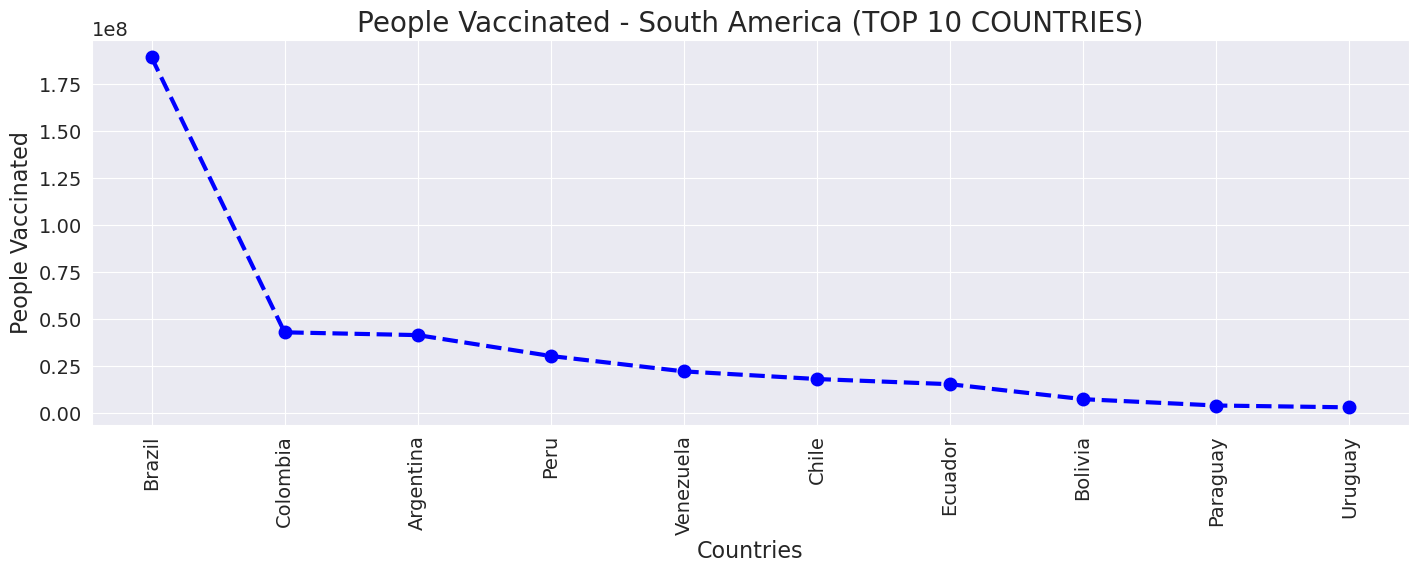

In [90]:
plt.plot(sam10_vaccinated['location'], sam10_vaccinated['people_vaccinated'], 'o--b', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Vaccinated', fontsize=16)
plt.title('People Vaccinated - South America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [91]:
sam10_vaccinated

,location,people_vaccinated
0,Brazil,189395212.0
1,Colombia,42959468.0
2,Argentina,41476547.0
3,Peru,30346384.0
4,Venezuela,22157232.0
5,Chile,18088517.0
6,Ecuador,15330893.0
7,Bolivia,7361008.0
8,Paraguay,3987448.0
9,Uruguay,3006661.0


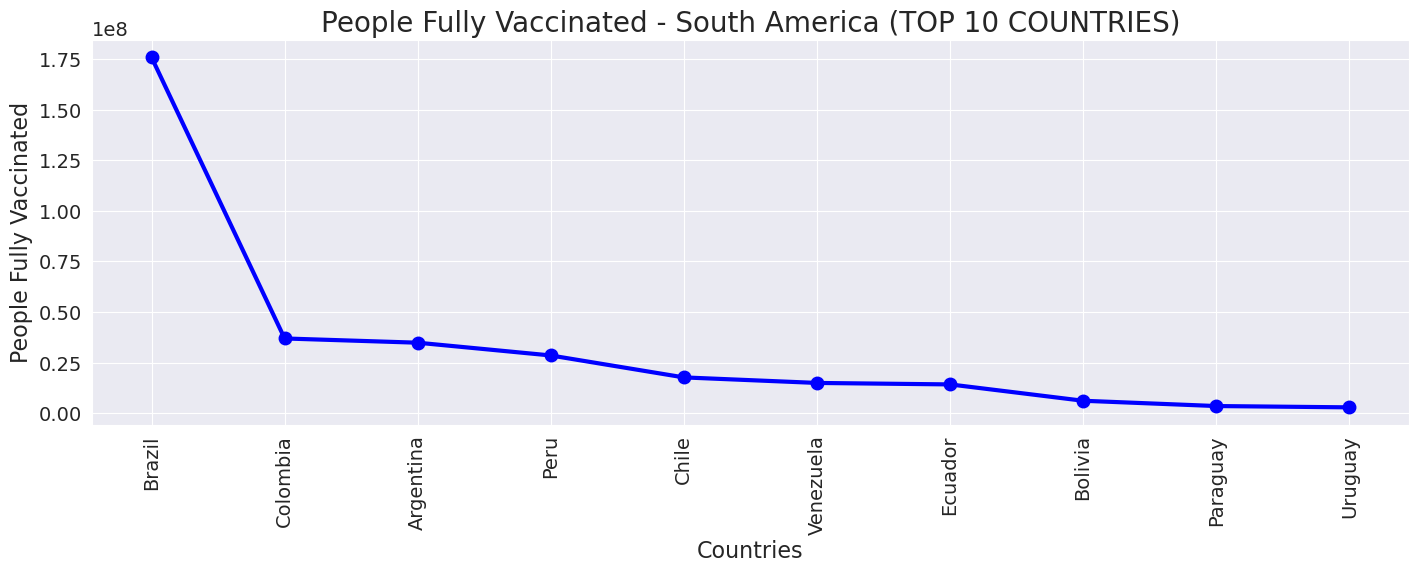

In [92]:
plt.plot(sam10_fullvaccinated['location'], sam10_fullvaccinated['people_fully_vaccinated'], 'o-b', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Fully Vaccinated', fontsize=16)
plt.title('People Fully Vaccinated - South America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [93]:
sam10_fullvaccinated

,location,people_fully_vaccinated
0,Brazil,175904530.0
1,Colombia,36948604.0
2,Argentina,34854197.0
3,Peru,28545833.0
4,Chile,17700117.0
5,Venezuela,14966671.0
6,Ecuador,14236025.0
7,Bolivia,6160585.0
8,Paraguay,3543358.0
9,Uruguay,2899172.0


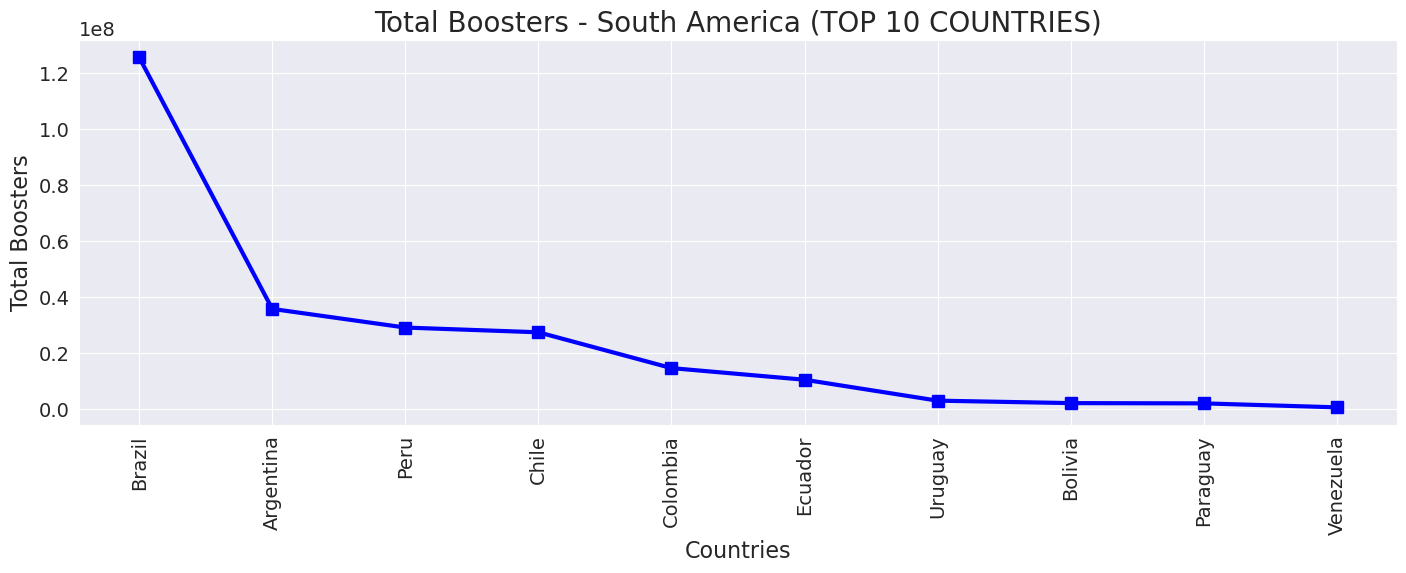

In [94]:
plt.plot(sam10_boosters['location'], sam10_boosters['total_boosters'], 's-b', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Boosters', fontsize=16)
plt.title('Total Boosters - South America (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [95]:
sam10_boosters

,location,total_boosters
0,Brazil,125736675.0
1,Argentina,35831372.0
2,Peru,29170278.0
3,Chile,27474929.0
4,Colombia,14675916.0
5,Ecuador,10519419.0
6,Uruguay,3041854.0
7,Bolivia,2167589.0
8,Paraguay,2071754.0
9,Venezuela,651502.0


# Oceania

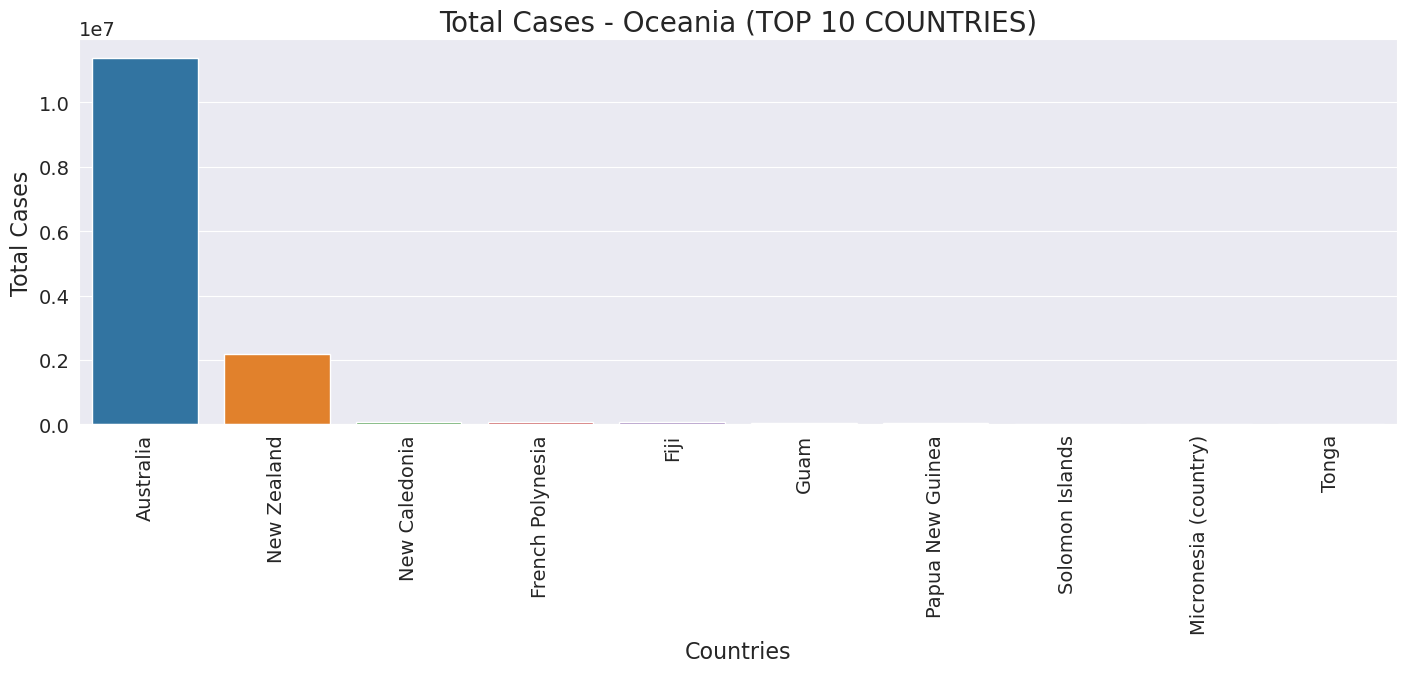

In [96]:
sns.barplot(x='location', y='total_cases', data=oce10_cases)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases', fontsize=16)
plt.title('Total Cases - Oceania (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [97]:
oce10_cases

,location,total_cases
0,Australia,11380700.0
1,New Zealand,2176499.0
2,New Caledonia,80017.0
3,French Polynesia,78055.0
4,Fiji,68897.0
5,Guam,50869.0
6,Papua New Guinea,46825.0
7,Solomon Islands,24575.0
8,Micronesia (country),23948.0
9,Tonga,16810.0


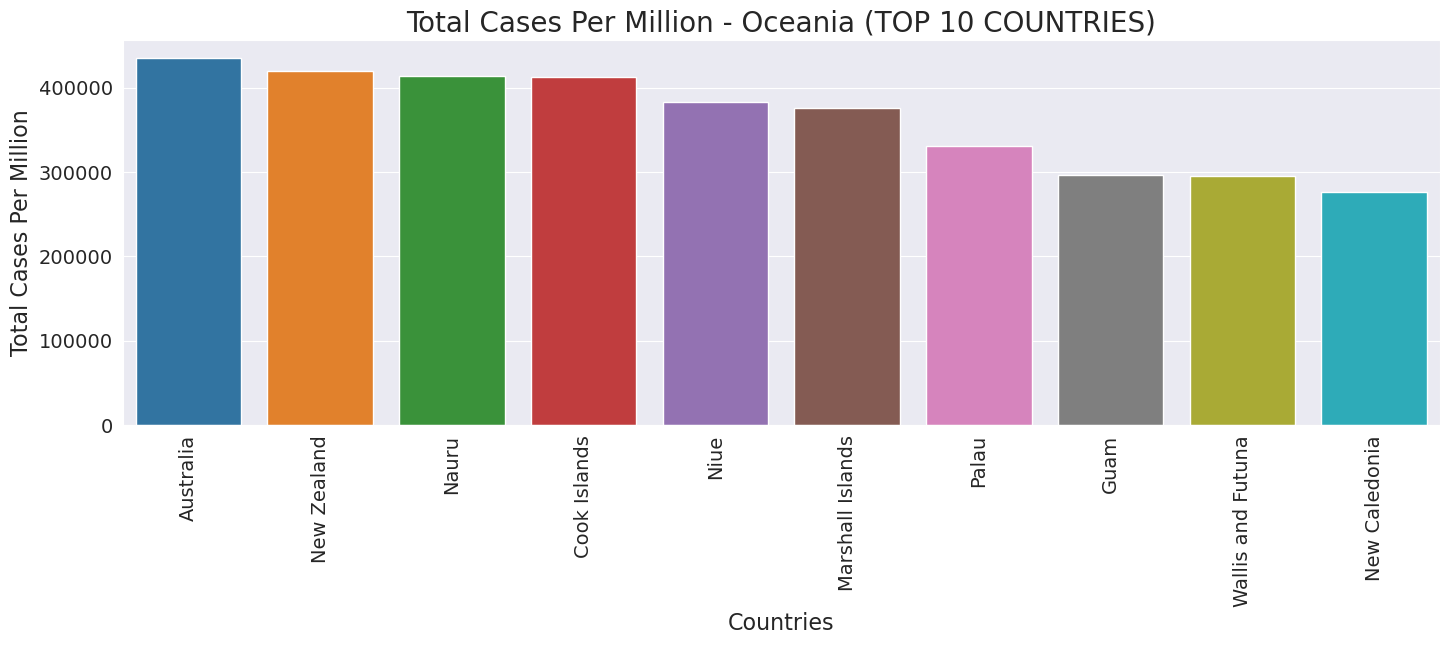

In [98]:
sns.barplot(x='location', y='total_cases_per_million', data=oce10_casespm)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases Per Million', fontsize=16)
plt.title('Total Cases Per Million - Oceania (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [99]:
oce10_casespm

,location,total_cases_per_million
0,Australia,434752.712
1,New Zealand,419744.975
2,Nauru,413442.597
3,Cook Islands,412811.179
4,Niue,382684.426
5,Marshall Islands,376241.194
6,Palau,331287.326
7,Guam,296123.598
8,Wallis and Futuna,295532.942
9,New Caledonia,275959.705


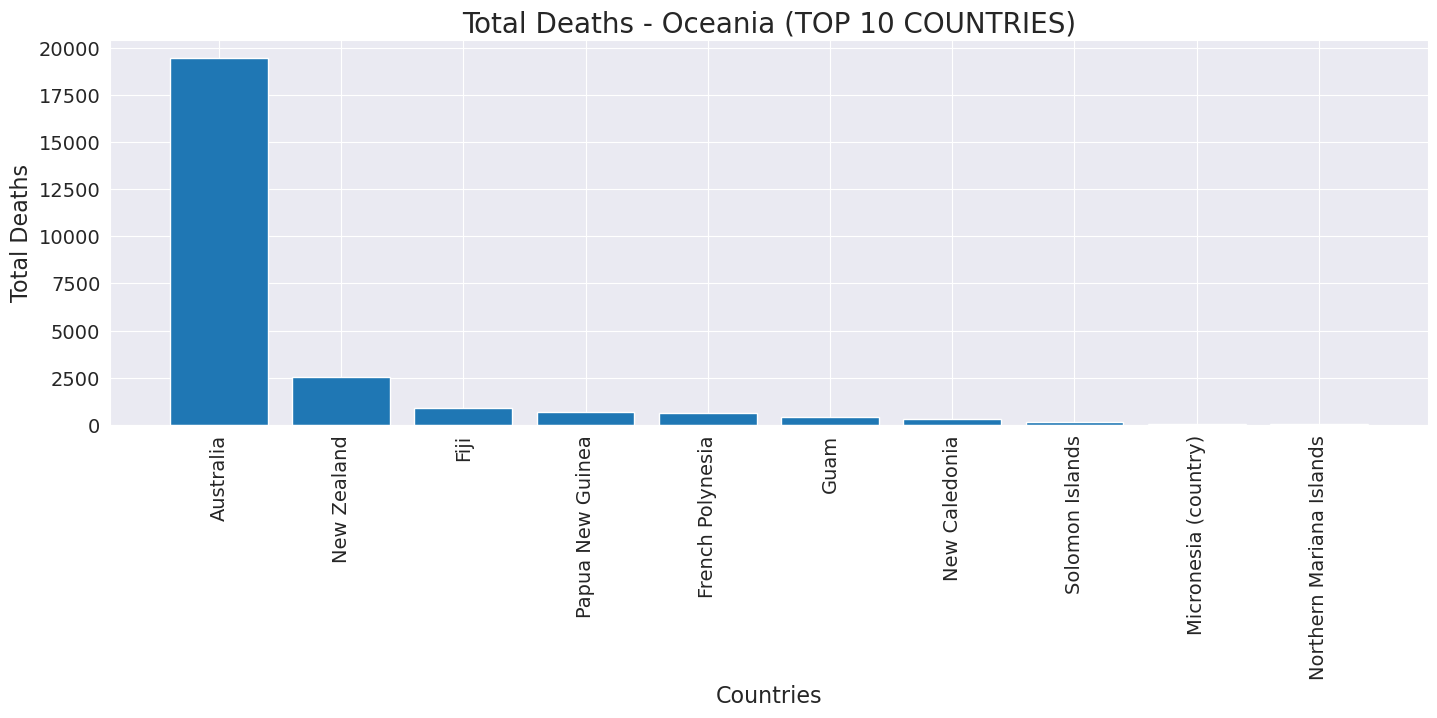

In [100]:
plt.bar(oce10_deaths['location'], oce10_deaths['total_deaths'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.title('Total Deaths - Oceania (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [101]:
oce10_deaths

,location,total_deaths
0,Australia,19447.0
1,New Zealand,2548.0
2,Fiji,883.0
3,Papua New Guinea,670.0
4,French Polynesia,649.0
5,Guam,420.0
6,New Caledonia,314.0
7,Solomon Islands,153.0
8,Micronesia (country),61.0
9,Northern Mariana Islands,41.0


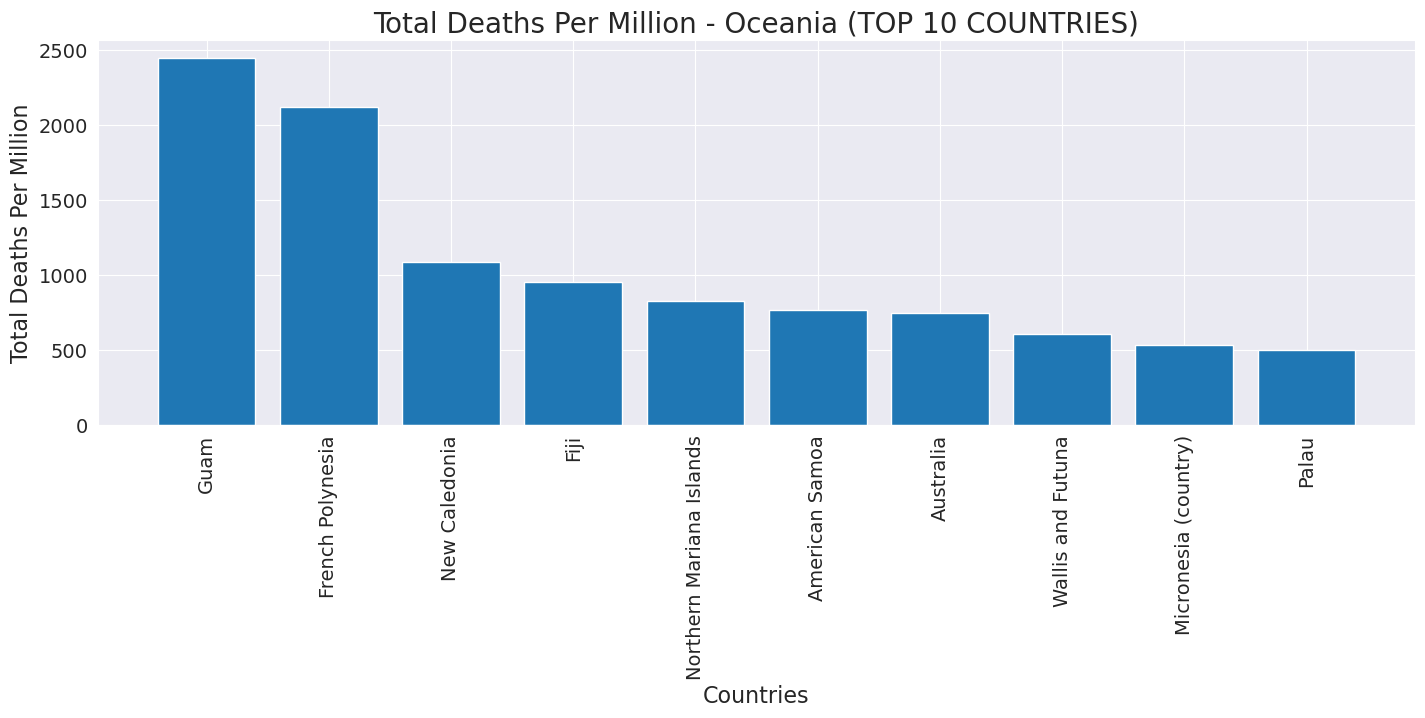

In [102]:
plt.bar(oce10_deathspm['location'], oce10_deathspm['total_deaths_per_million'])

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Deaths Per Million', fontsize=16)
plt.title('Total Deaths Per Million - Oceania (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [103]:
oce10_deathspm

,location,total_deaths_per_million
0,Guam,2444.945
1,French Polynesia,2118.893
2,New Caledonia,1082.912
3,Fiji,949.698
4,Northern Mariana Islands,827.046
5,American Samoa,767.581
6,Australia,742.892
7,Wallis and Futuna,603.656
8,Micronesia (country),534.254
9,Palau,497.678


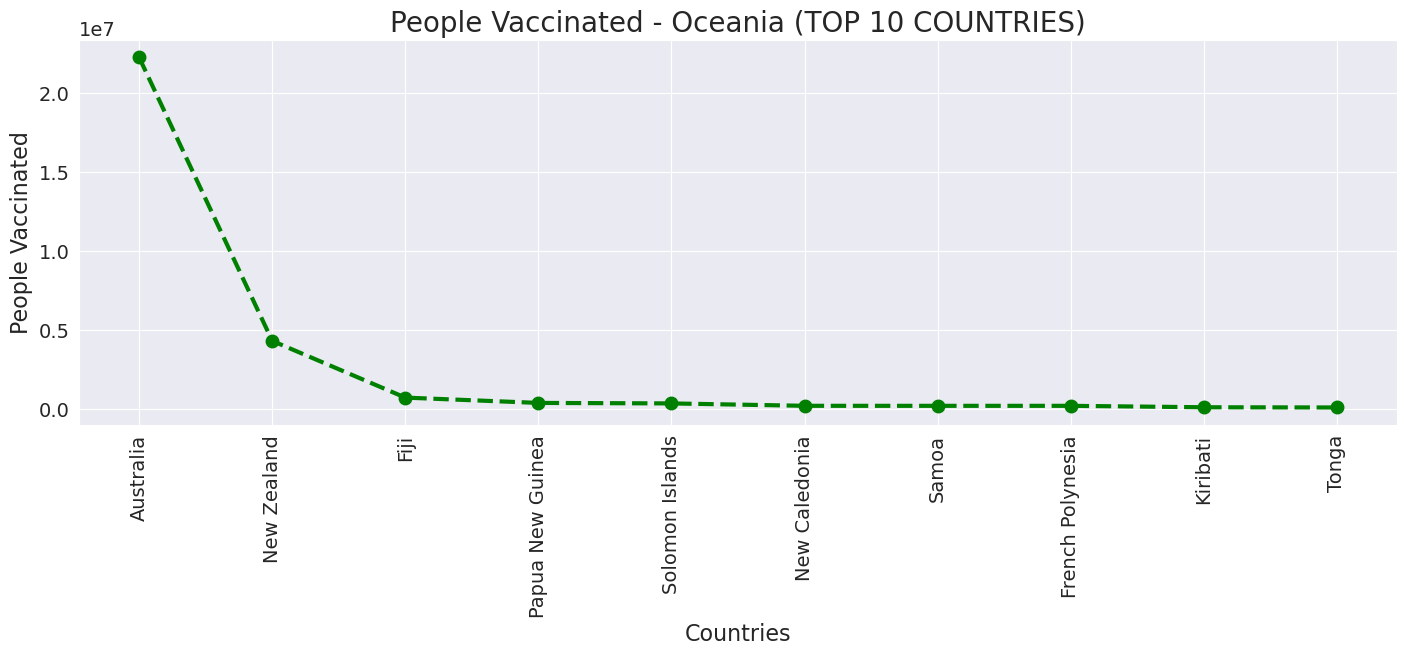

In [104]:
plt.plot(oce10_vaccinated['location'], oce10_vaccinated['people_vaccinated'], 'o--g', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Vaccinated', fontsize=16)
plt.title('People Vaccinated - Oceania (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [105]:
oce10_vaccinated

,location,people_vaccinated
0,Australia,22236698.0
1,New Zealand,4301076.0
2,Fiji,711859.0
3,Papua New Guinea,375829.0
4,Solomon Islands,343821.0
5,New Caledonia,192310.0
6,Samoa,191371.0
7,French Polynesia,190908.0
8,Kiribati,100900.0
9,Tonga,87265.0


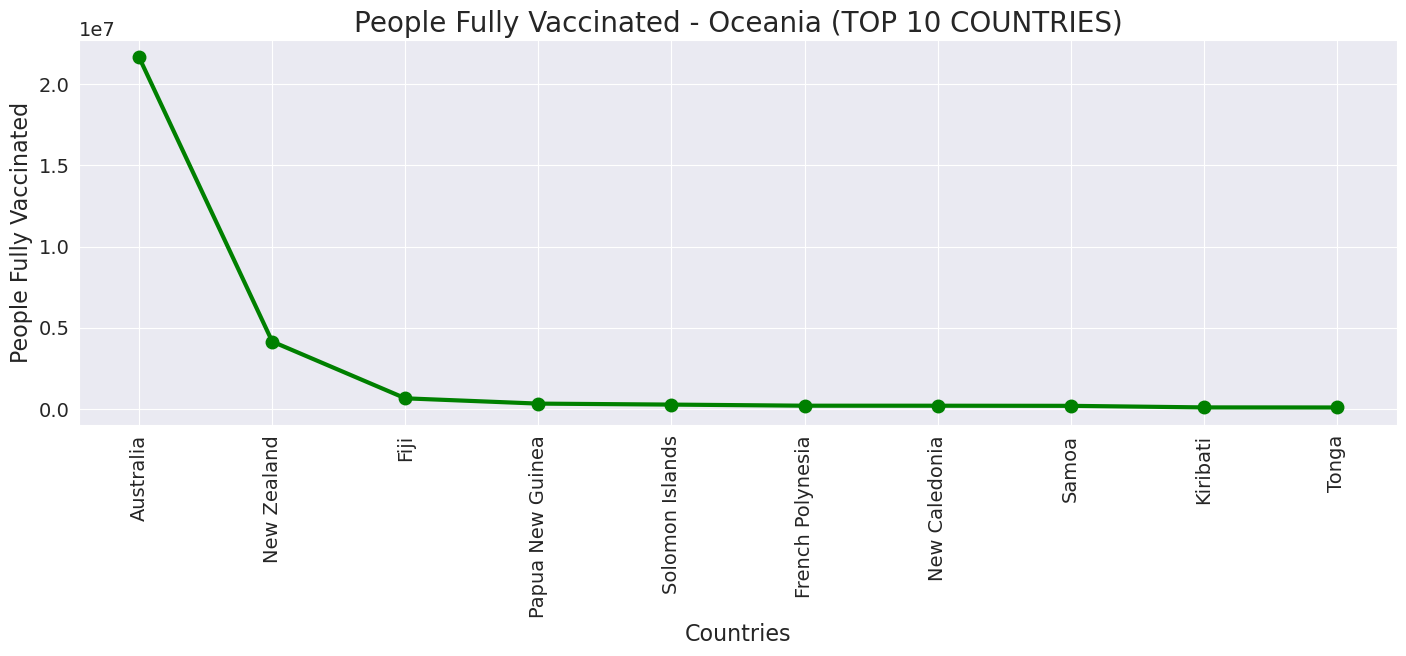

In [106]:
plt.plot(oce10_fullvaccinated['location'], oce10_fullvaccinated['people_fully_vaccinated'], 'o-g', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('People Fully Vaccinated', fontsize=16)
plt.title('People Fully Vaccinated - Oceania (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [107]:
oce10_fullvaccinated

,location,people_fully_vaccinated
0,Australia,21654488.0
1,New Zealand,4140472.0
2,Fiji,640942.0
3,Papua New Guinea,315210.0
4,Solomon Islands,254352.0
5,French Polynesia,186203.0
6,New Caledonia,184730.0
7,Samoa,177885.0
8,Kiribati,81474.0
9,Tonga,77008.0


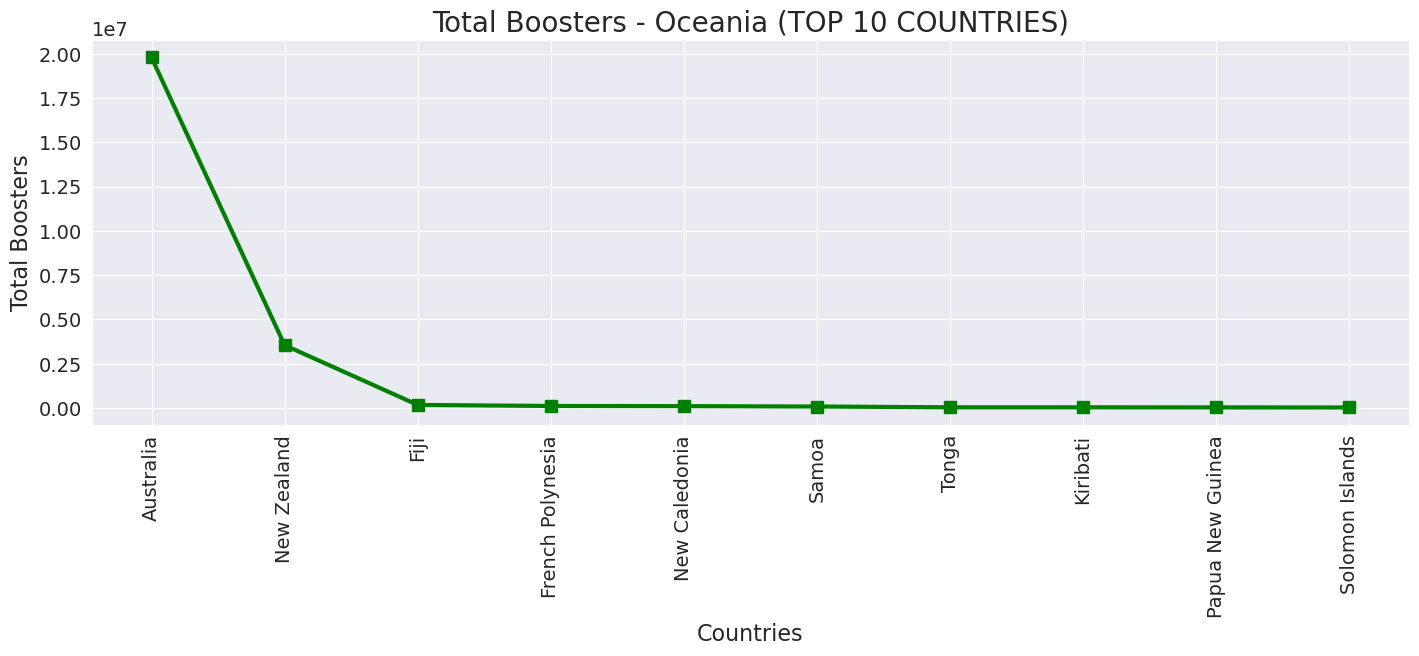

In [108]:
plt.plot(oce10_boosters['location'], oce10_boosters['total_boosters'], 's-g', lw=3, ms=9)

plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Boosters', fontsize=16)
plt.title('Total Boosters - Oceania (TOP 10 COUNTRIES)', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [109]:
oce10_boosters

,location,total_boosters
0,Australia,19790466.0
1,New Zealand,3544162.0
2,Fiji,171060.0
3,French Polynesia,112237.0
4,New Caledonia,102910.0
5,Samoa,82117.0
6,Tonga,38447.0
7,Kiribati,37606.0
8,Papua New Guinea,33539.0
9,Solomon Islands,27783.0


# Continents

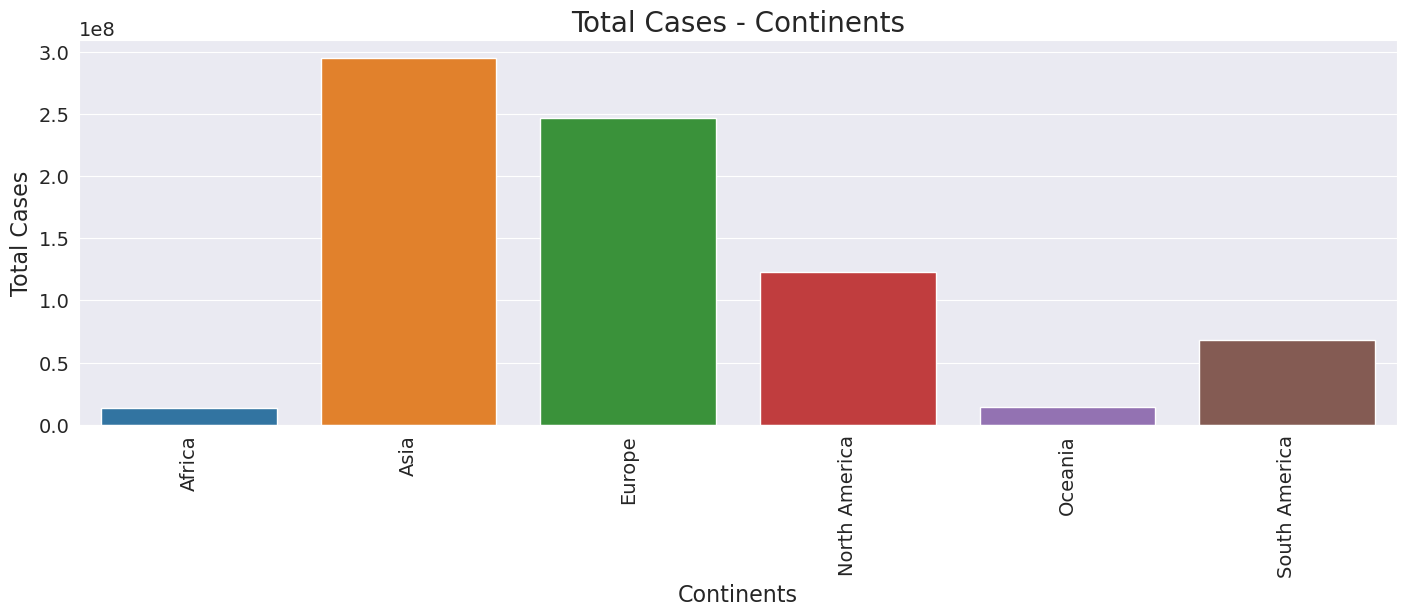

In [110]:
sns.barplot(x='location', y='total_cases', data=new_df)

plt.xlabel('Continents', fontsize=16)
plt.ylabel('Total Cases', fontsize=16)
plt.title('Total Cases - Continents', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

In [111]:
new_df

,location,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,people_vaccinated,people_fully_vaccinated,total_boosters,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population
0,Africa,13053883.0,9149.469,258748.0,181.357,5.053902e+08,4.177394e+08,7.639702e+07,35.42,29.28,5.35,1.426737e+09
1,Asia,294846415.0,62449.158,1624653.0,344.105,3.666959e+09,3.433644e+09,1.782843e+09,77.67,72.73,37.76,4.721383e+09
2,Europe,246769927.0,331320.276,2023316.0,2716.561,5.227133e+08,4.992528e+08,3.575768e+08,70.18,67.03,48.01,7.448078e+08
3,North America,122709749.0,204405.986,1583415.0,2637.602,4.573262e+08,3.934715e+08,2.511464e+08,76.18,65.54,41.84,6.003237e+08
4,Oceania,14043499.0,311808.492,25324.0,562.270,2.895752e+07,2.792110e+07,2.399748e+07,64.29,61.99,53.28,4.503886e+07
5,South America,67979025.0,155623.694,1350960.0,3092.739,3.748751e+08,3.363807e+08,2.514730e+08,85.82,77.01,57.57,4.368167e+08


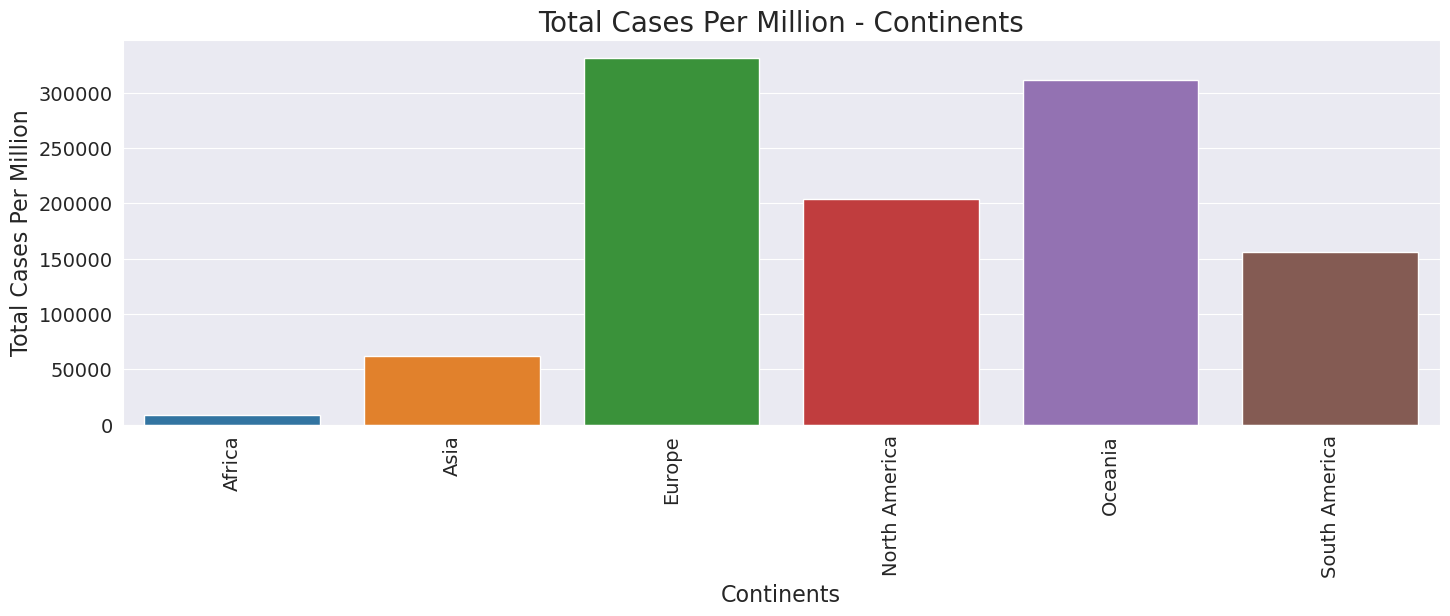

In [112]:
sns.barplot(x='location', y='total_cases_per_million', data=new_df)

plt.xlabel('Continents', fontsize=16)
plt.ylabel('Total Cases Per Million', fontsize=16)
plt.title('Total Cases Per Million - Continents', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

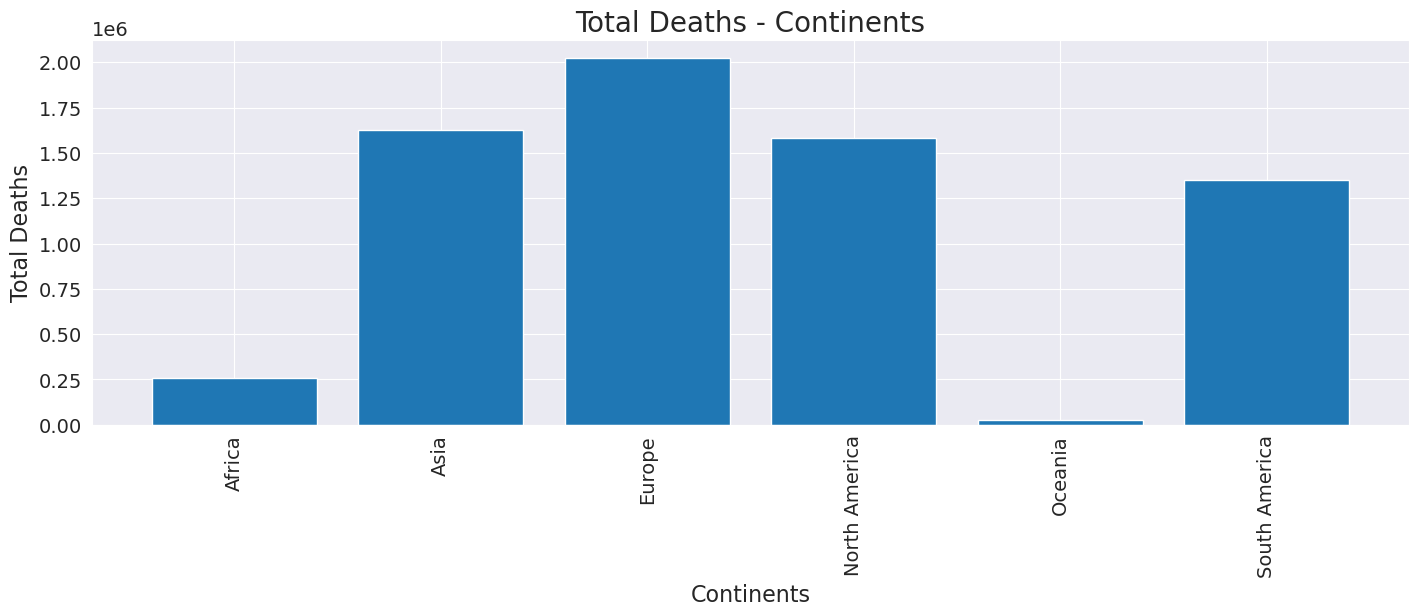

In [113]:
plt.bar(new_df['location'], new_df['total_deaths'])

plt.xlabel('Continents', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.title('Total Deaths - Continents', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

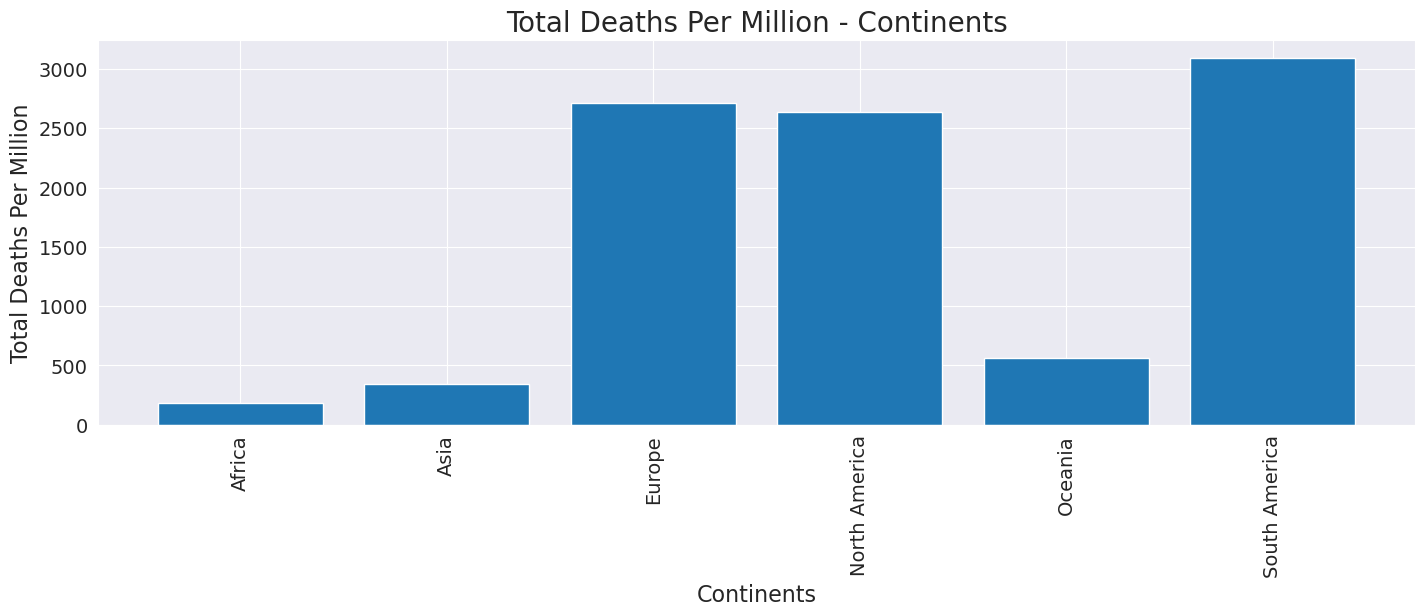

In [114]:
plt.bar(new_df['location'], new_df['total_deaths_per_million'])

plt.xlabel('Continents', fontsize=16)
plt.ylabel('Total Deaths Per Million', fontsize=16)
plt.title('Total Deaths Per Million - Continents', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

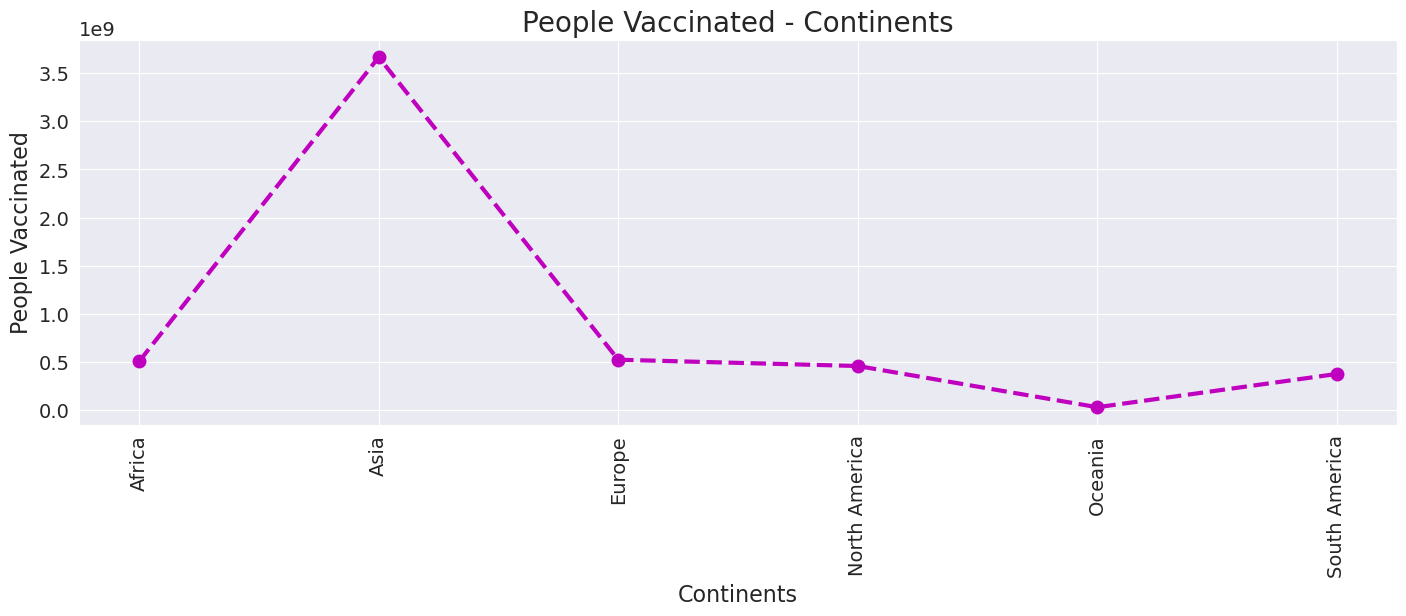

In [115]:
plt.plot(new_df['location'], new_df['people_vaccinated'], 'o--m', lw=3, ms=9)

plt.xlabel('Continents', fontsize=16)
plt.ylabel('People Vaccinated', fontsize=16)
plt.title('People Vaccinated - Continents', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

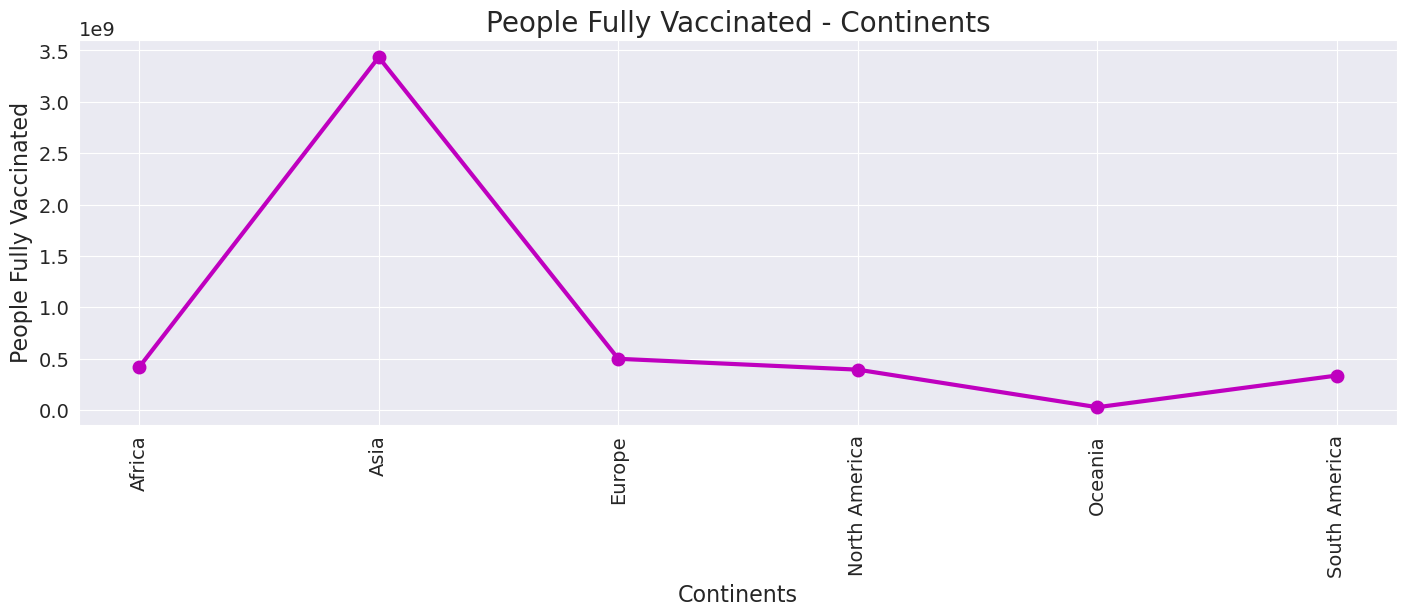

In [116]:
plt.plot(new_df['location'], new_df['people_fully_vaccinated'], 'o-m', lw=3, ms=9)

plt.xlabel('Continents', fontsize=16)
plt.ylabel('People Fully Vaccinated', fontsize=16)
plt.title('People Fully Vaccinated - Continents', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

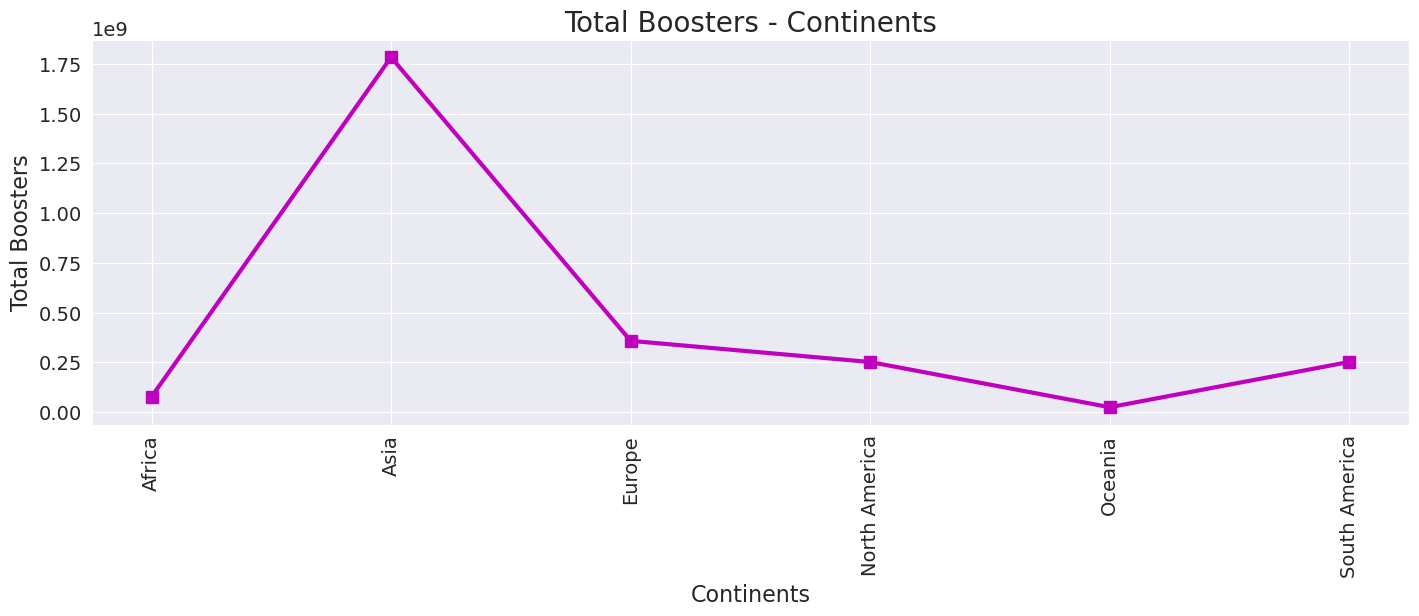

In [117]:
plt.plot(new_df['location'], new_df['total_boosters'], 's-m', lw=3, ms=9)

plt.xlabel('Continents', fontsize=16)
plt.ylabel('Total Boosters', fontsize=16)
plt.title('Total Boosters - Continents', fontsize=20)
plt.xticks(rotation = 'vertical')

plt.show();

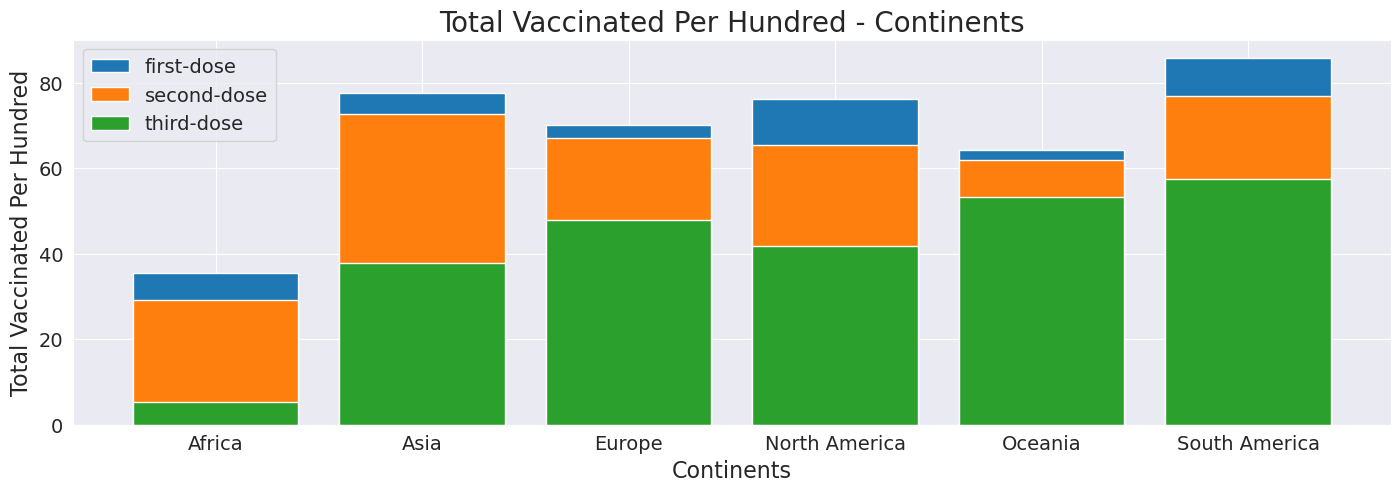

In [118]:
plt.bar(new_df["location"], new_df["people_vaccinated_per_hundred"])
plt.bar(new_df["location"], new_df["people_fully_vaccinated_per_hundred"])
plt.bar(new_df["location"], new_df["total_boosters_per_hundred"])

plt.xlabel('Continents', fontsize=16)
plt.ylabel('Total Vaccinated Per Hundred', fontsize=16)

plt.title('Total Vaccinated Per Hundred - Continents', fontsize=20)
plt.legend(['first-dose', 'second-dose', 'third-dose'], loc='upper left')

plt.show();

# Concluding Remarks

To summarize, the study demonstrates that while the number of new cases is fluctuating, it is generally on the rise. Similarly, the number of new deaths is fluctuating but remains lower than the number of new cases. Moreover, the vaccination campaign is making steady progress with a growing number of individuals receiving vaccinations.